In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [ ]:
columns = ['strength', 'pa', 'num_images', 'pos_rms', 'mag_rms', 't_mpole_str', 't_mpole_pa', 'chi2', 'z', 'x', 'y', 'e', 'pow_pa', 'r_ein', 'pwi']
df = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Test/Sim 9_summary.csv', header=None, names=columns, skiprows=1) 
df

strength         pa  num_images   pos_rms       mag_rms  t_mpole_str  \
0          0.001    0.00000           1  0.032746  5.658633e+06     0.000163   
1          0.001    0.36036           0  0.000000  0.000000e+00     0.000000   
2          0.001    0.72072           0  0.000000  0.000000e+00     0.000000   
3          0.001    1.08108           1  0.033757  5.226283e+06     0.000114   
4          0.001    1.44144           0  0.000000  0.000000e+00     0.000000   
...          ...        ...         ...       ...           ...          ...   
999995     0.100  358.55856           4  0.000031  5.643050e+00     0.176100   
999996     0.100  358.91892           4  0.000031  9.254275e+00     0.102399   
999997     0.100  359.27928           1  0.054763  1.885863e+05     0.000057   
999998     0.100  359.63964           5  0.000031  7.182635e+01     0.097083   
999999     0.100  360.00000           4  0.000031  3.601625e+01     0.142330   

        t_mpole_pa        chi2    z         x         y             e  \
0        -6.996308  586.864500  1.0  20.80811  20.77515  1.290263e-07   
1         0.000000    0.000000  0.0   0.00000   0.00000  0.000000e+00   
2         0.000000    0.000000  0.0   0.00000   0.00000  0.000000e+00   
3         7.344973  586.457400  1.0  20.80800  20.77518  8.357626e-08   
4         0.000000    0.000000  0.0   0.00000   0.00000  0.000000e+00   
...            ...         ...  ...       ...       ...           ...   
999995  325.683900    0.000002  1.0  20.83068  20.79598  5.050464e-01   
999996  301.938300    0.000004  1.0  20.84812  20.79003  9.881306e-02   
999997  359.988400  586.042100  1.0  20.80799  20.77524  2.713273e-05   
999998  286.769100    0.000003  1.0  20.87048  20.78544  2.864157e-02   
999999  191.730200    0.000003  1.0  20.82466  20.67384  9.653224e-02   

           pow_pa     r_ein       pwi  
0       92.714100  0.488098  1.503333  
1        0.000000  0.000000  0.000000  
2        0.000000  0.000000  0.000000  
3       87.839370  0.487912  1.500765  
4        0.000000  0.000000  0.000000  
...           ...       ...       ...  
999995  -3.795002  0.494889  2.477233  
999996  -6.652060  0.486099  1.938562  
999997  14.193040  0.487810  1.500191  
999998 -10.101540  0.483096  1.501340  
999999   0.326996  0.471001  1.663472  

[1000000 rows x 15 columns]

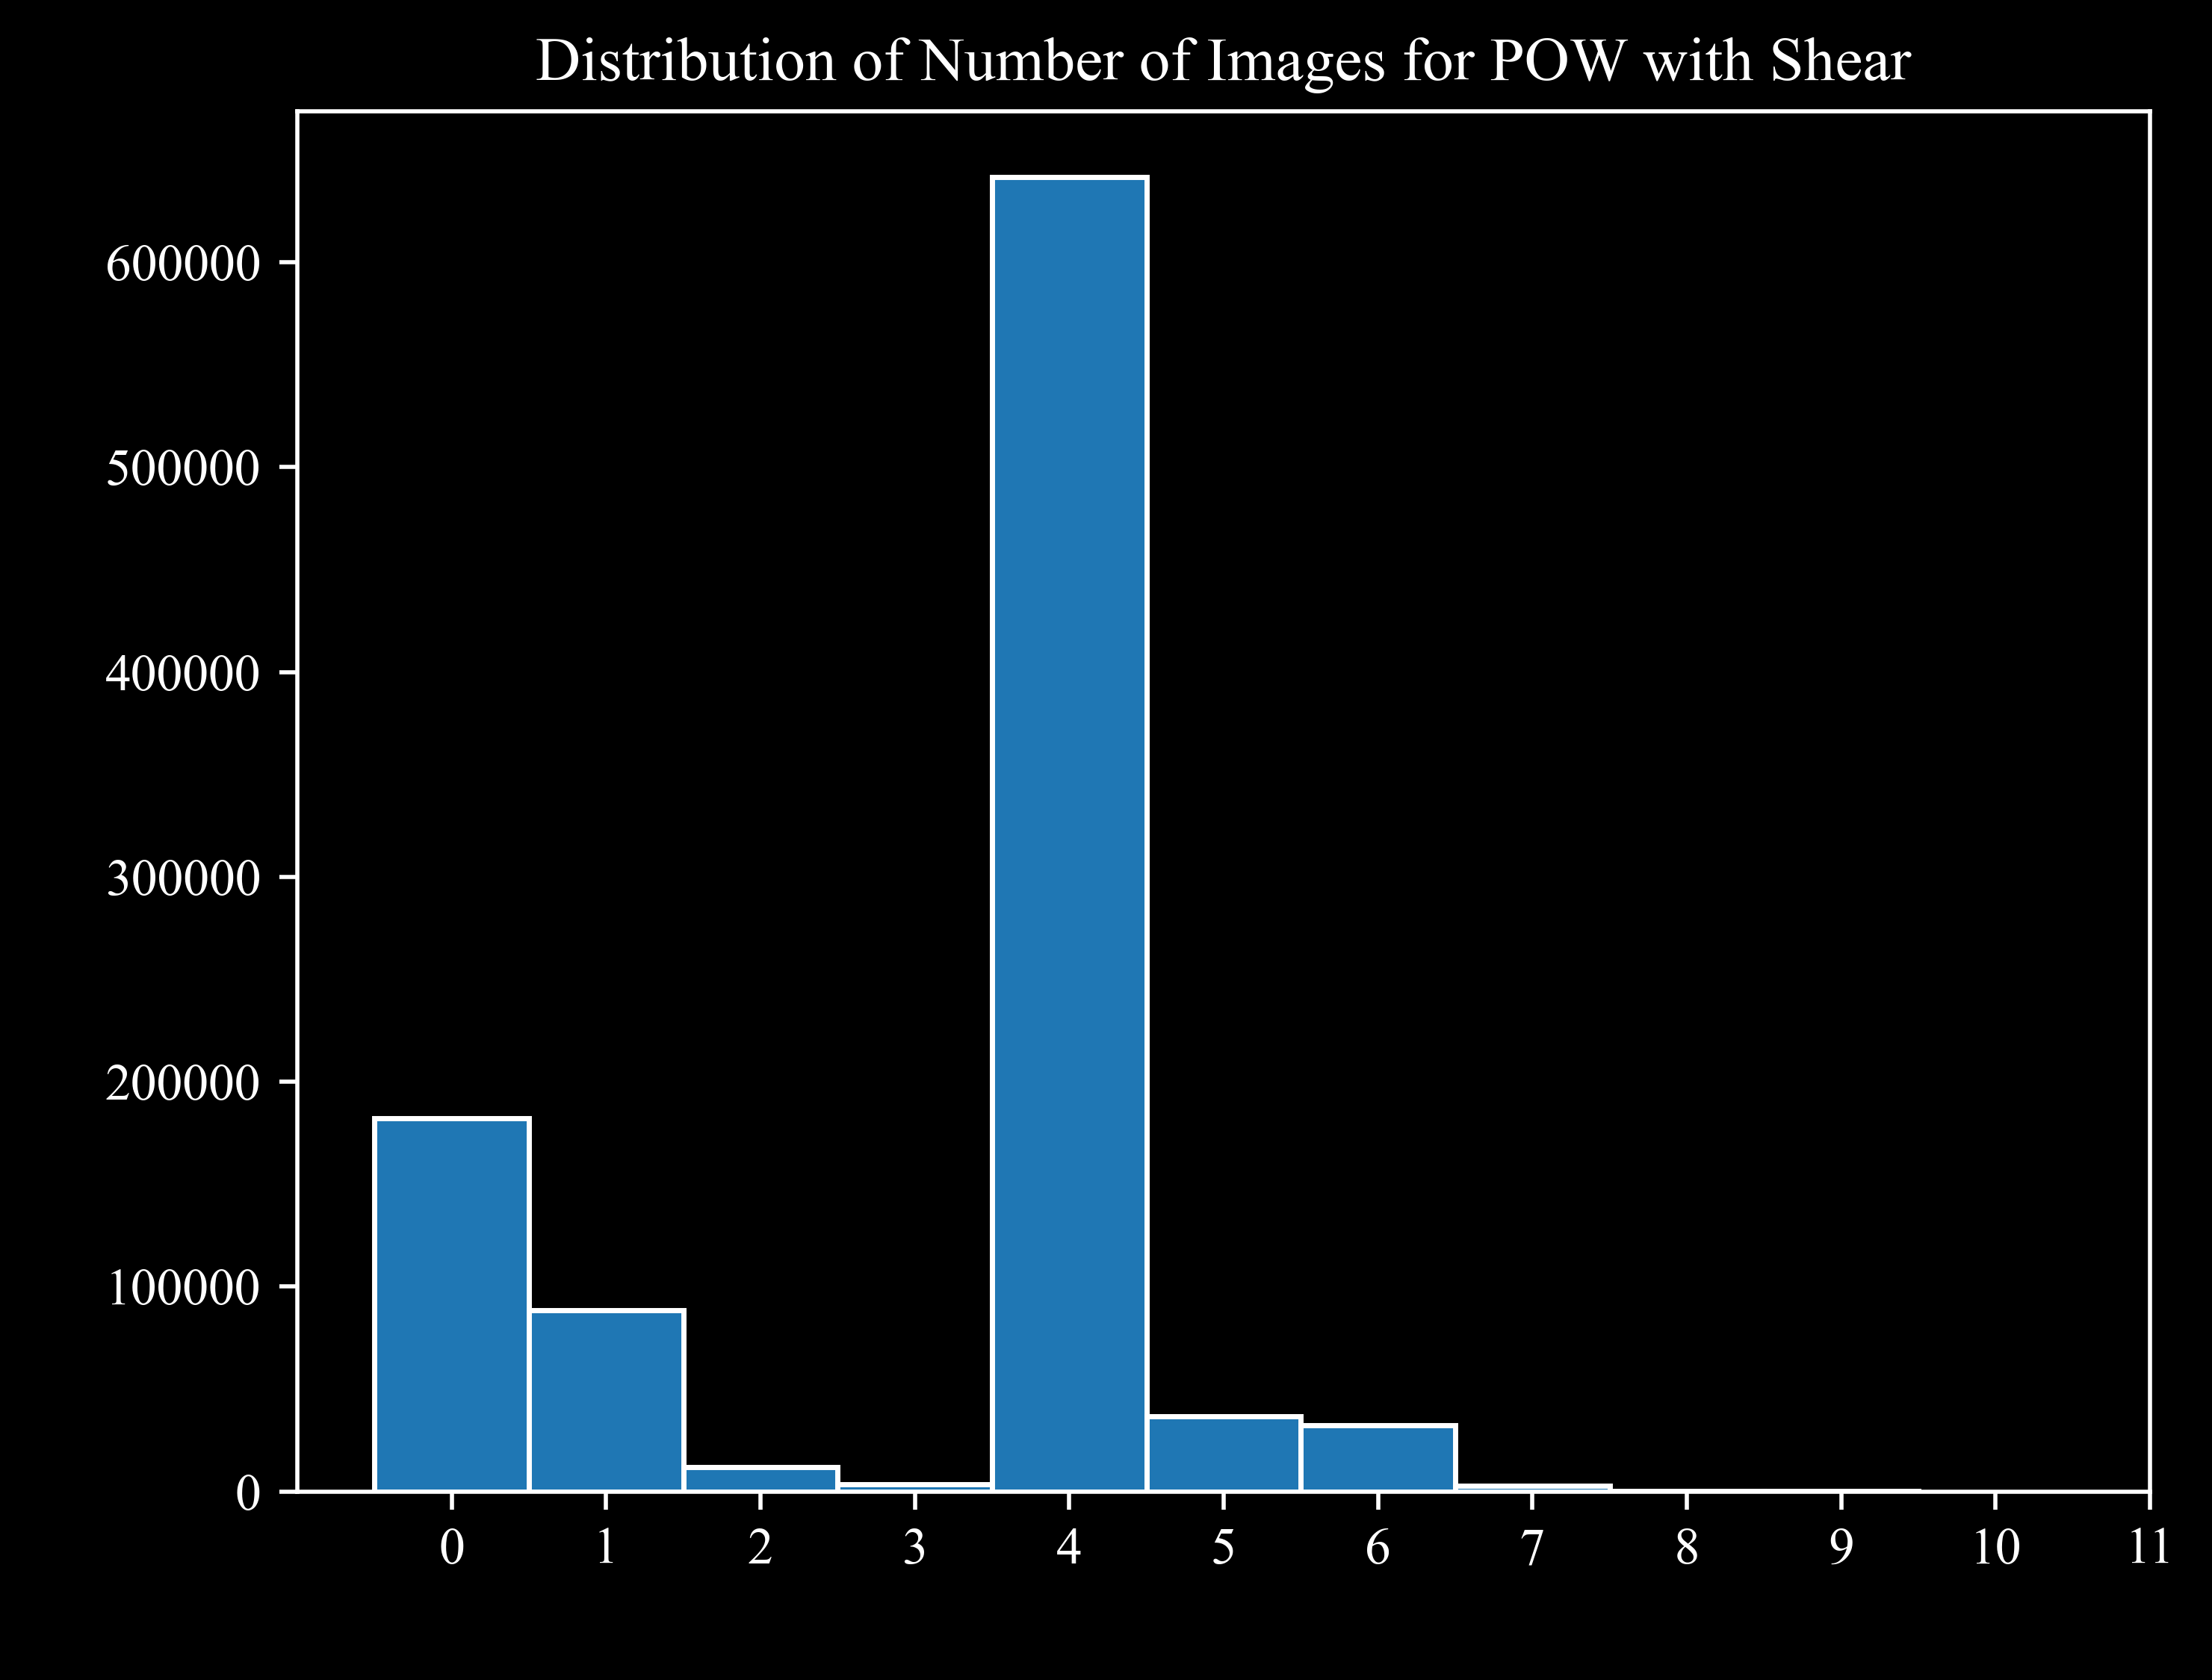

In [ ]:
plt.hist(df['num_images'], bins=range(0, 11), align='left', edgecolor='w')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images for POW with MPOLE')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

In [6]:
mask = df['num_images'] == 4
filtered_df_0 = df[mask]
filtered_df_0 = filtered_df_0.reset_index(drop=True)

# Precentage of 4 image models 
percentage_4_images = (len(filtered_df_0) / len(df)) * 100
print(f"Percentage of 4 image models: {percentage_4_images:.2f}%")

Percentage of 4 image models: 64.18%


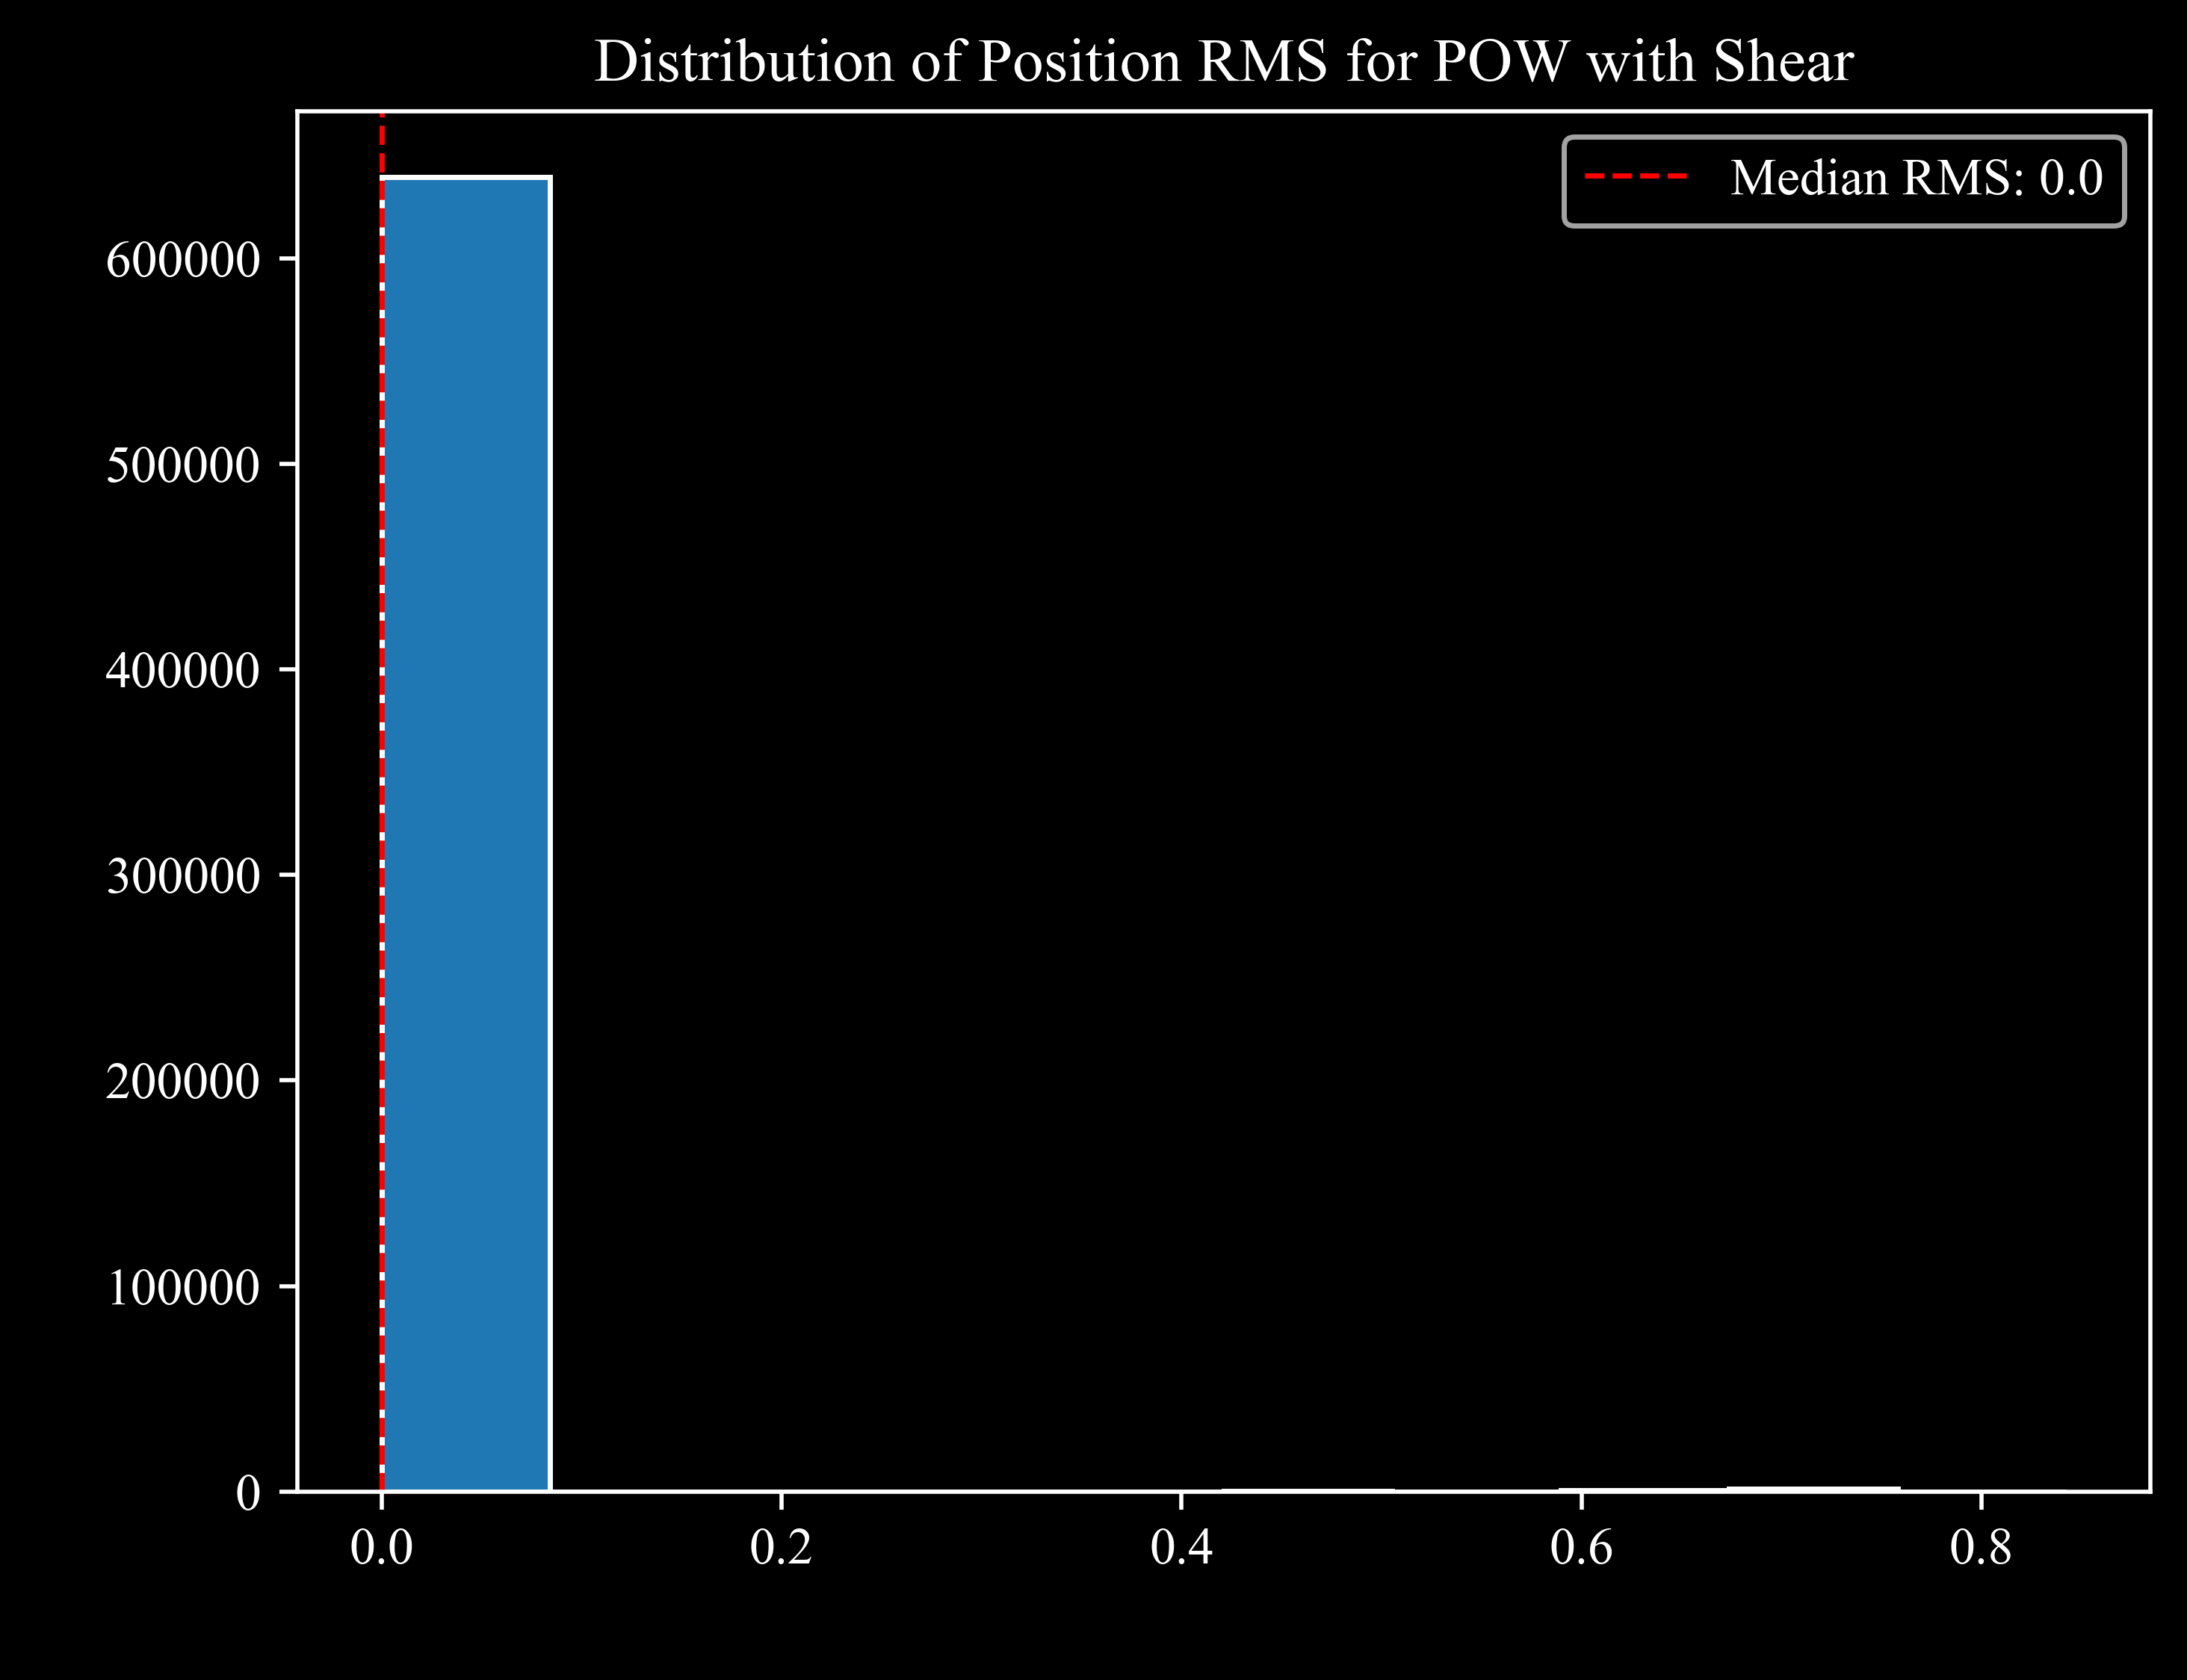

In [ ]:
plt.hist(filtered_df_0['pos_rms'], bins=10, edgecolor='w')
plt.axvline(filtered_df_0['pos_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['pos_rms'].median(), 4)))
plt.xlabel('Position RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Position RMS for POW with MPOLE')
plt.show()

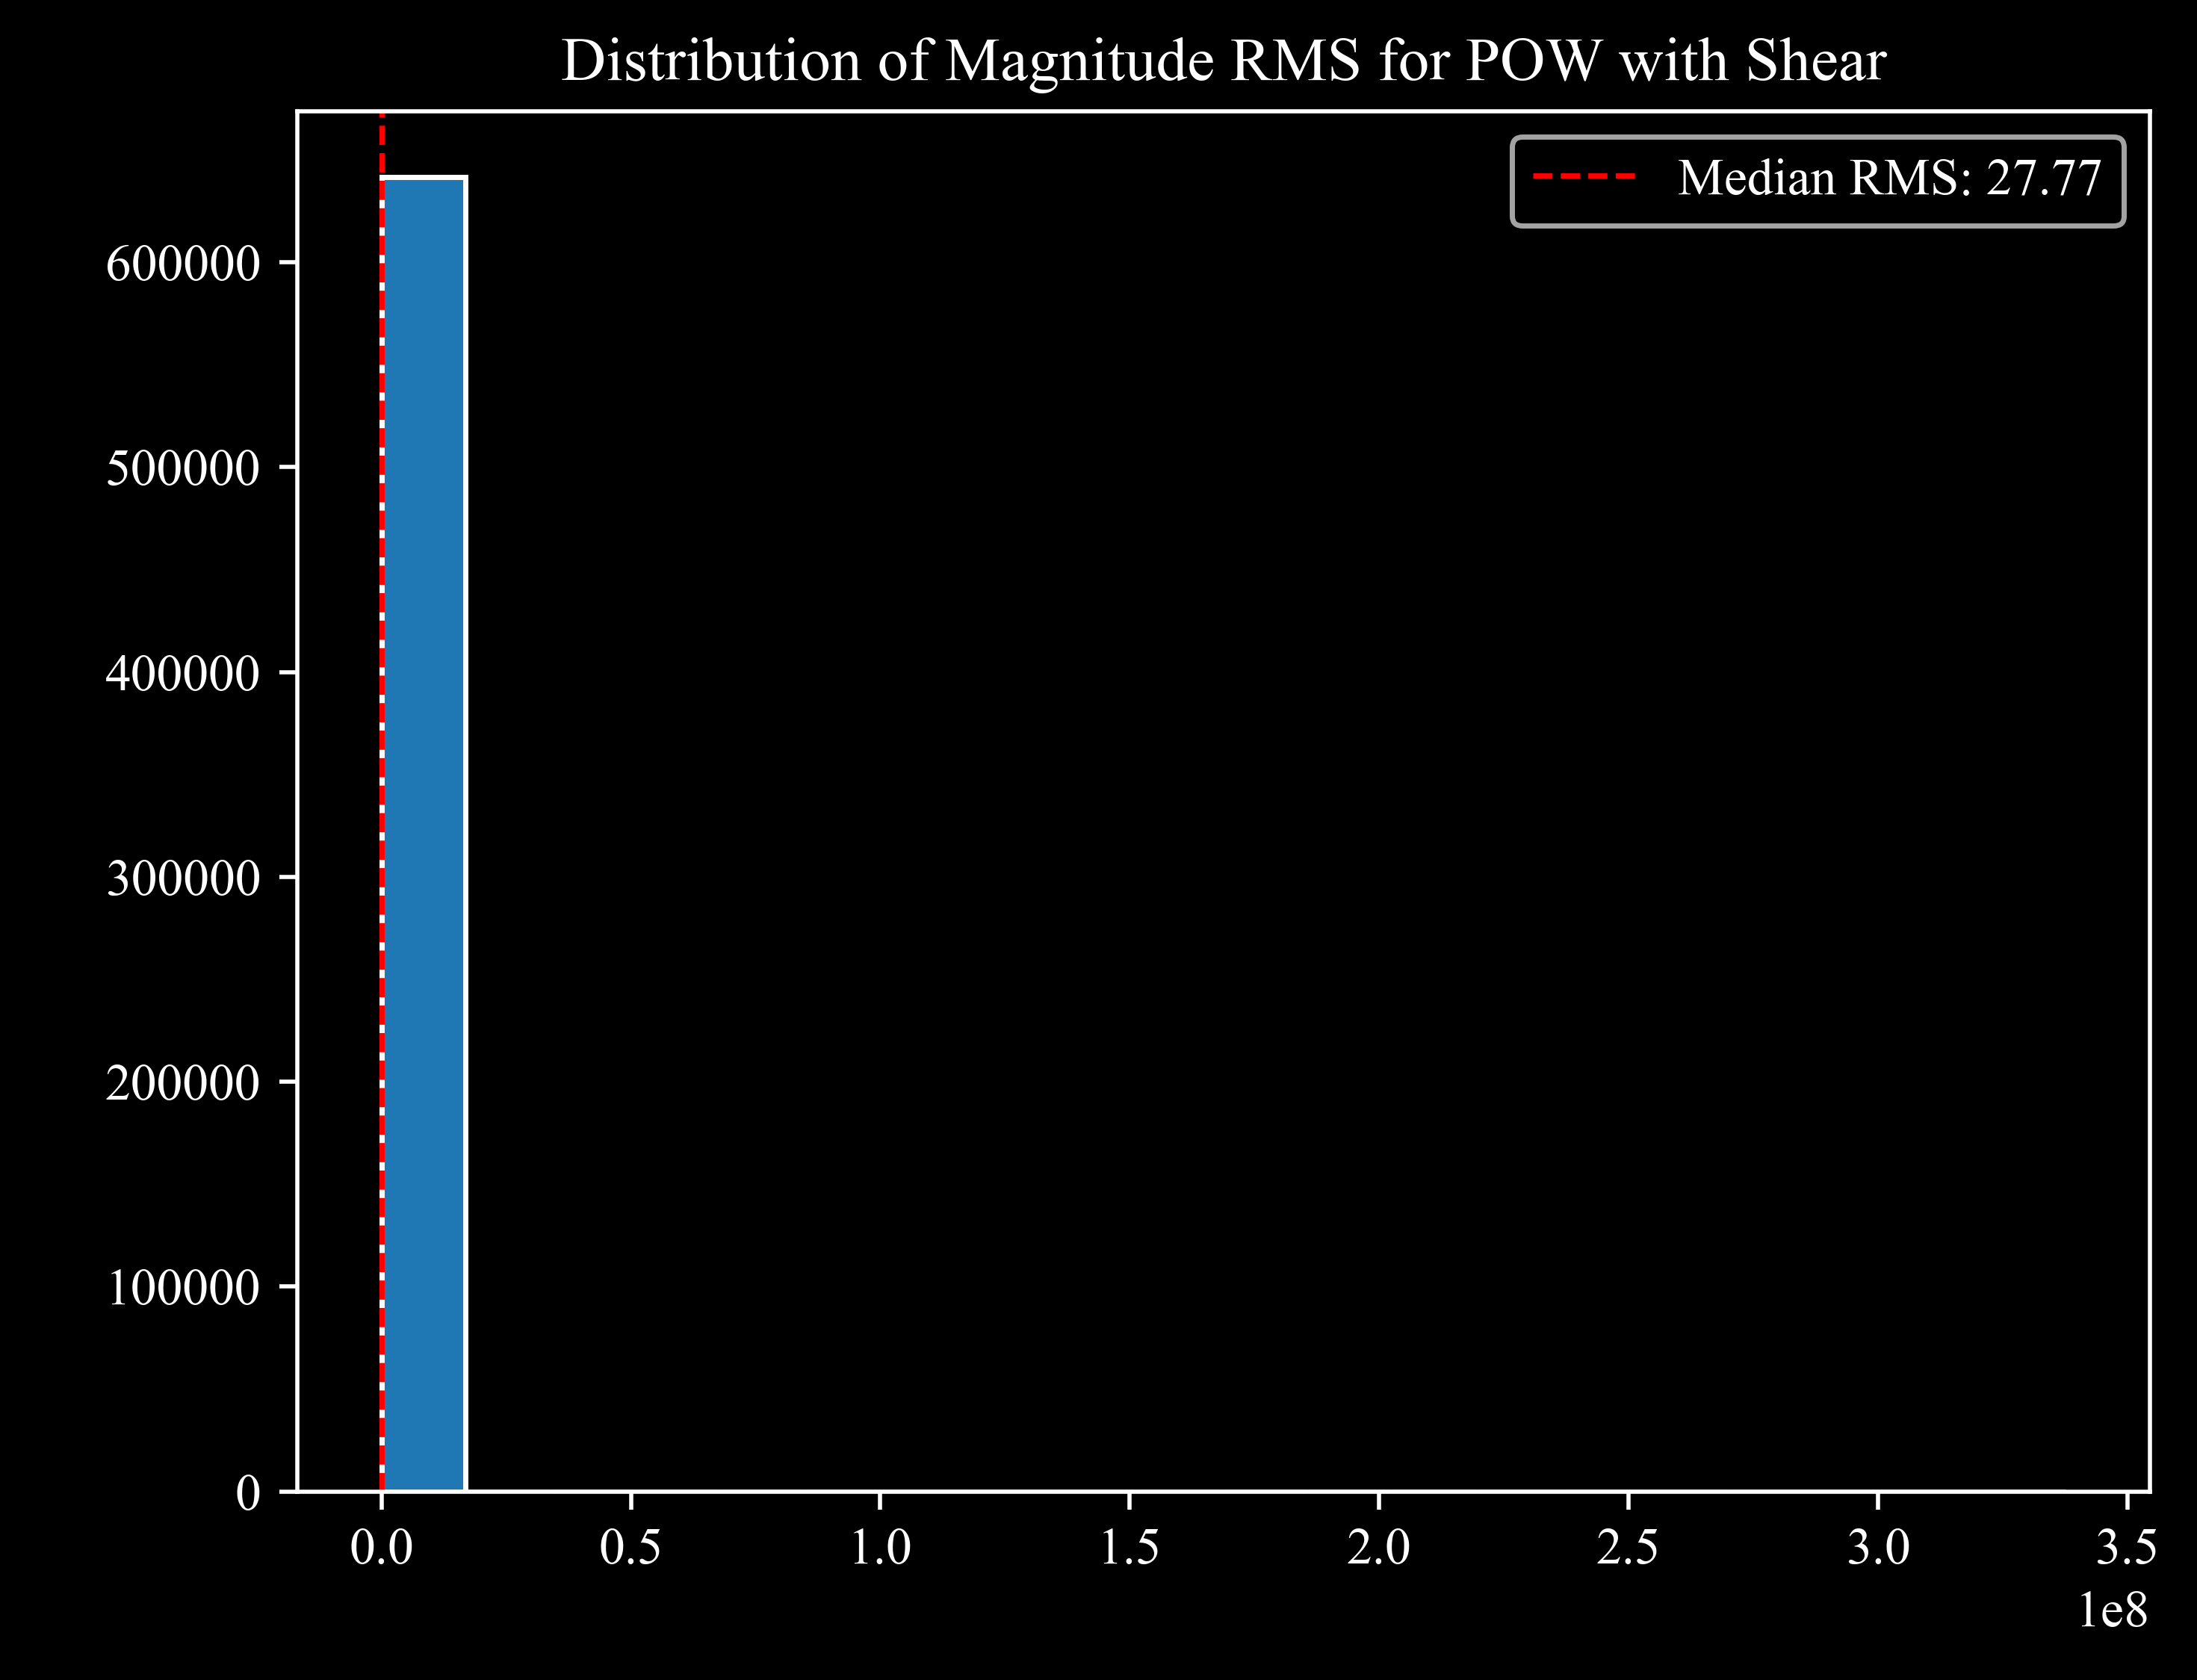

In [ ]:
plt.hist(filtered_df_0['mag_rms'], bins=20, edgecolor='w')
plt.axvline(filtered_df_0['mag_rms'].median(), color='r', linestyle='dashed', linewidth=1, label='Median RMS: ' + str(round(filtered_df_0['mag_rms'].median(), 2)))
plt.xlabel('Magnitude RMS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Magnitude RMS for POW with MPOLE')
plt.show()

In [11]:
mask2 = filtered_df_0['pos_rms']  == 3.101229586803652e-05
filtered_df = filtered_df_0[mask2]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

strength         pa  num_images   pos_rms    mag_rms  t_mpole_str  \
0          0.001    3.24324           4  0.000031  51.221850     0.083654   
1          0.001    9.36937           4  0.000031  18.944500     0.170109   
2          0.001   10.45045           4  0.000031  49.599525     0.169648   
3          0.001   10.81081           4  0.000031  53.742075     0.172214   
4          0.001   12.25225           4  0.000031  22.304550     0.171075   
...          ...        ...         ...       ...        ...          ...   
532563     0.100  357.83784           4  0.000031  10.768125     0.128714   
532564     0.100  358.19820           4  0.000031  21.212200     0.084417   
532565     0.100  358.55856           4  0.000031   5.643050     0.176100   
532566     0.100  358.91892           4  0.000031   9.254275     0.102399   
532567     0.100  360.00000           4  0.000031  36.016250     0.142330   

        t_mpole_pa      chi2    z         x         y         e      pow_pa  \
0        -87.32881  0.000003  1.0  20.86061  20.76824  0.036238  175.516600   
1        -81.05686  0.000003  1.0  20.88128  20.78238  0.044046  164.357600   
2        -86.23385  0.000002  1.0  20.90516  20.77728  0.010393  138.068900   
3        -93.38689  0.000002  1.0  20.90880  20.76524  0.002955   84.886440   
4       -102.49360  0.000002  1.0  20.88409  20.75667  0.027785  192.714700   
...            ...       ...  ...       ...       ...       ...         ...   
532563   313.09220  0.000002  1.0  20.85271  20.80941  0.098131   -9.121358   
532564   283.70710  0.000002  1.0  20.85180  20.77572  0.063442   -5.399811   
532565   325.68390  0.000002  1.0  20.83068  20.79598  0.505046   -3.795002   
532566   301.93830  0.000004  1.0  20.84812  20.79003  0.098813   -6.652060   
532567   191.73020  0.000003  1.0  20.82466  20.67384  0.096532    0.326996   

           r_ein       pwi  
0       0.485129  1.588853  
1       0.475550  2.155320  
2       0.469838  1.775327  
3       0.468580  1.763707  
4       0.474010  2.211238  
...          ...       ...  
532563  0.482651  1.876337  
532564  0.486328  1.793053  
532565  0.494889  2.477233  
532566  0.486099  1.938562  
532567  0.471001  1.663472  

[532568 rows x 15 columns]

In [12]:
# Percentage Calc
num_goodfit = len(filtered_df)
num_total = len(df[df['num_images'] == 4])
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits out of 4 image models: {percentage_goodfit:.2f}%")

num_goodfit = len(filtered_df)
num_total = len(df)
percentage_goodfit = (num_goodfit / num_total) * 100
print(f"Percentage of good fits: {percentage_goodfit:.2f}%")

Percentage of good fits out of 4 image models: 82.98%
Percentage of good fits: 53.26%


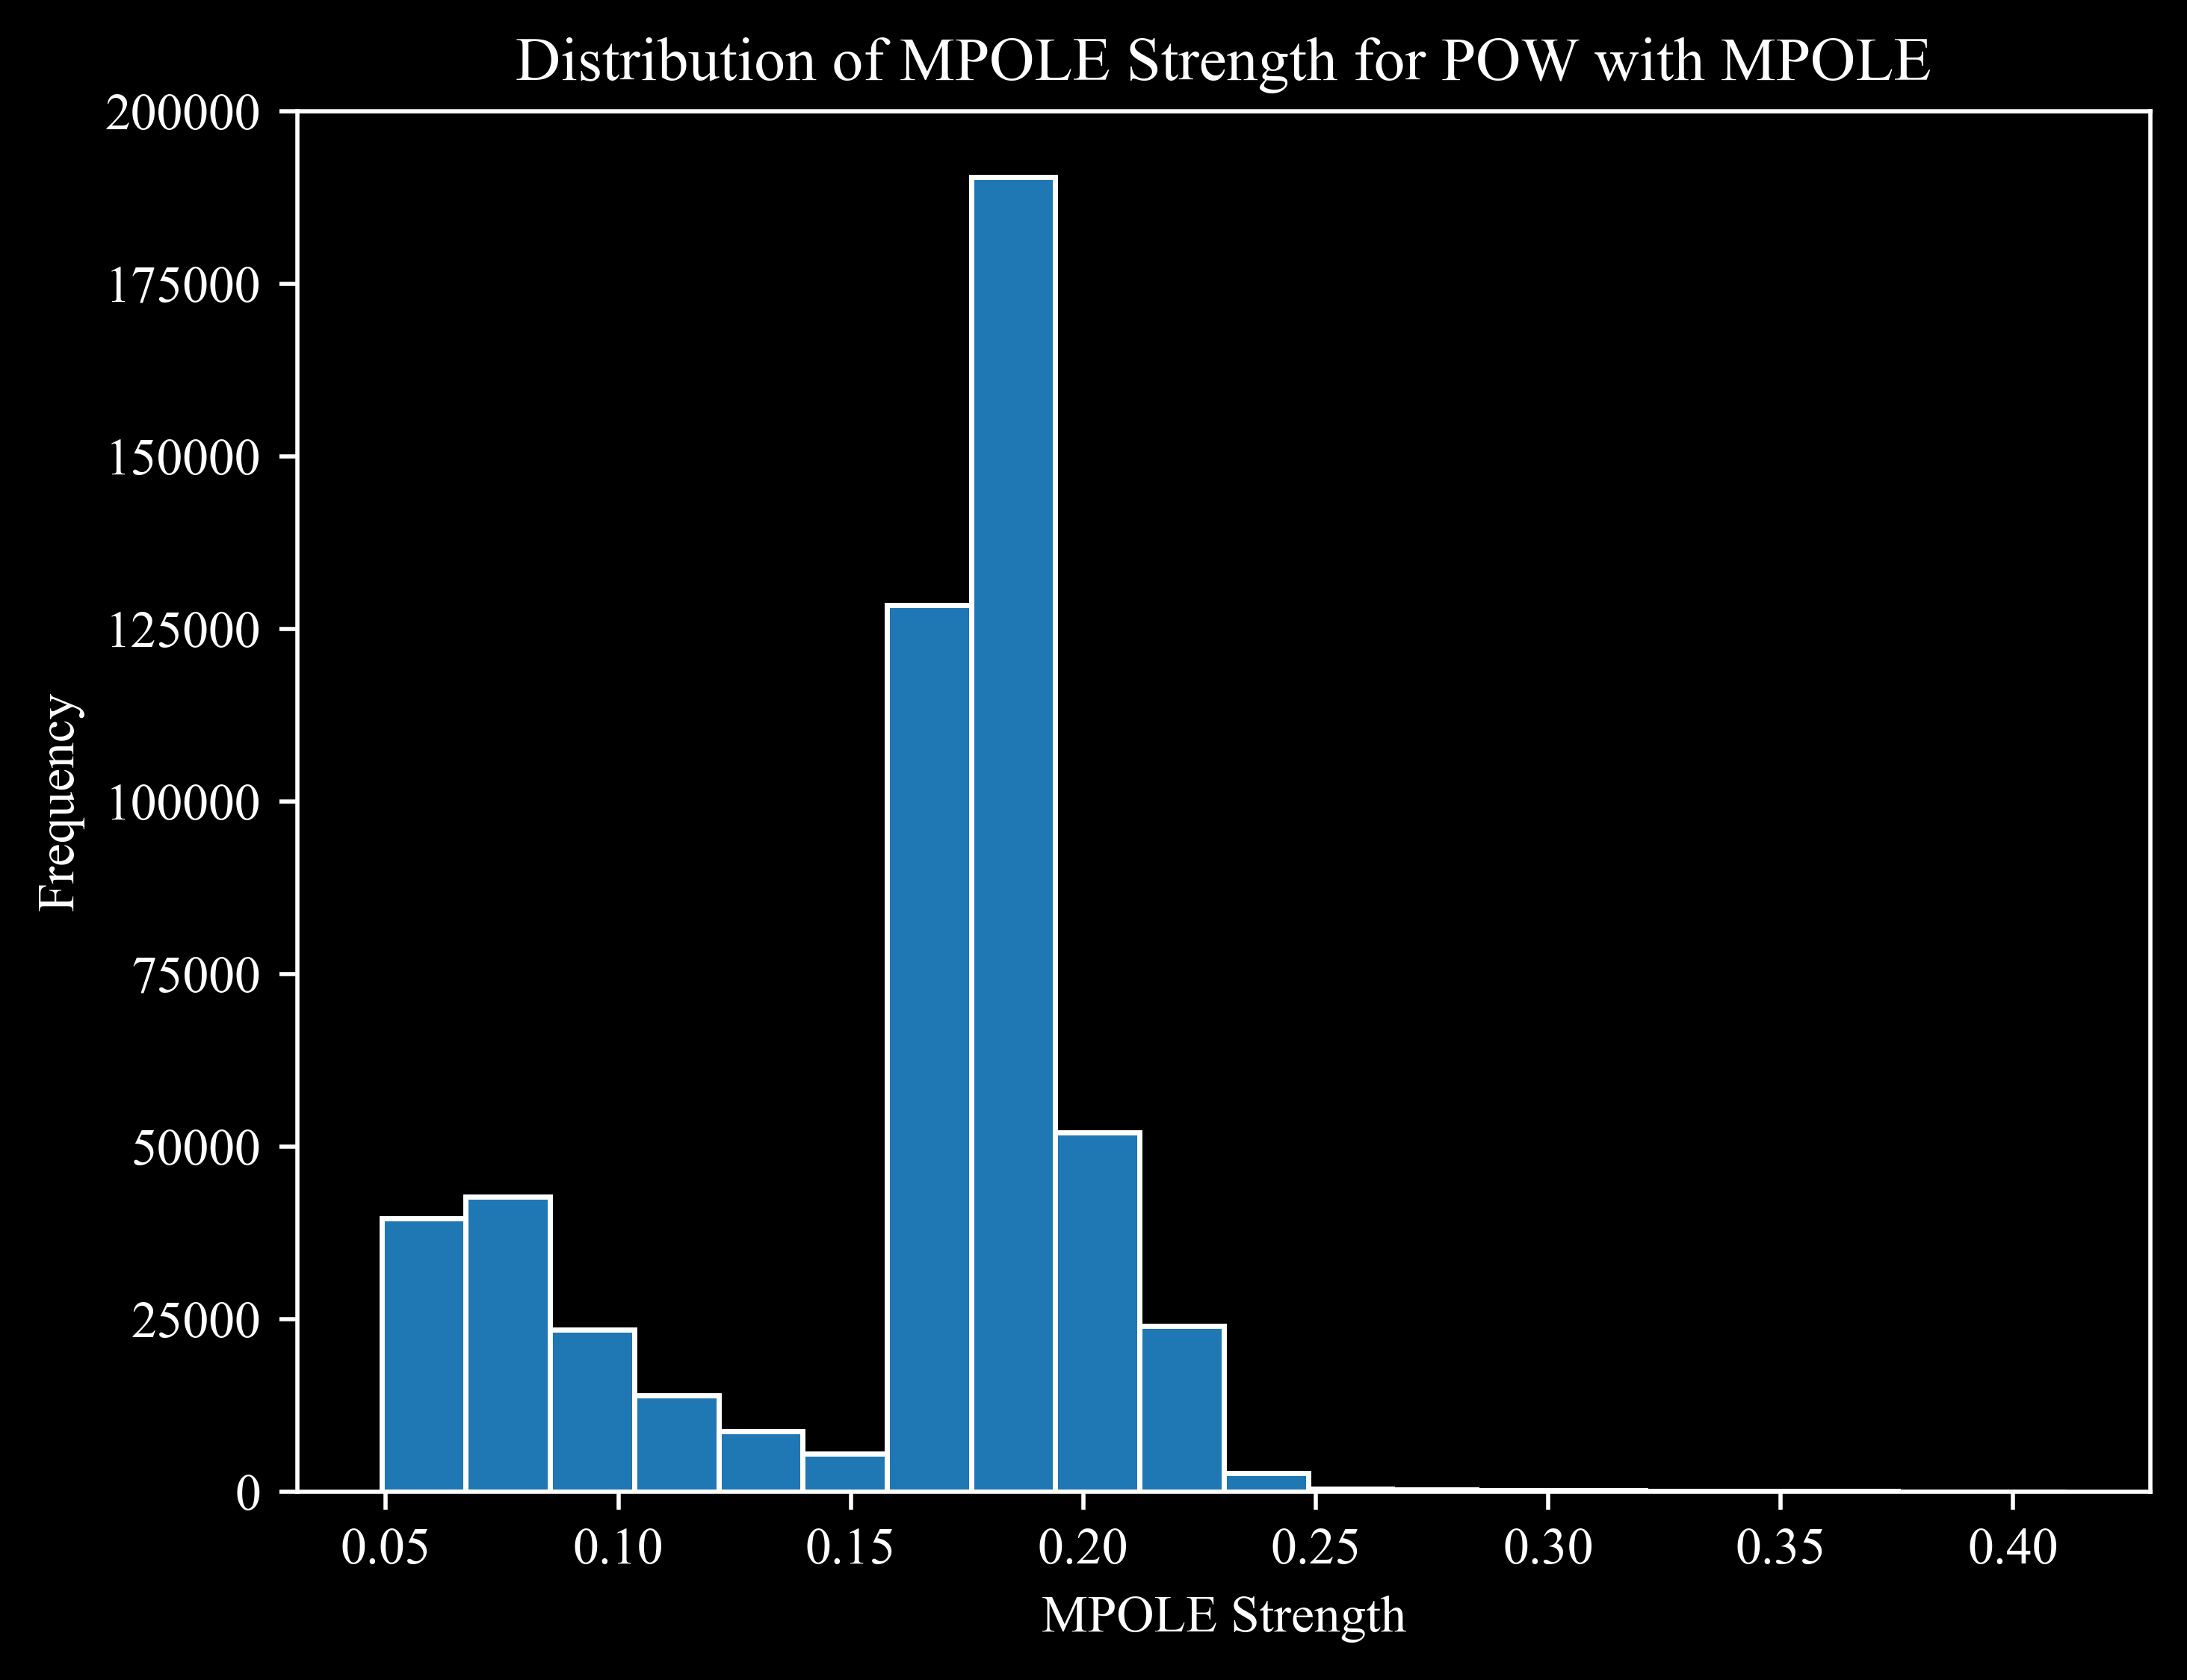

In [13]:
plt.hist(filtered_df['t_mpole_str'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Strength for POW with MPOLE')
plt.show()

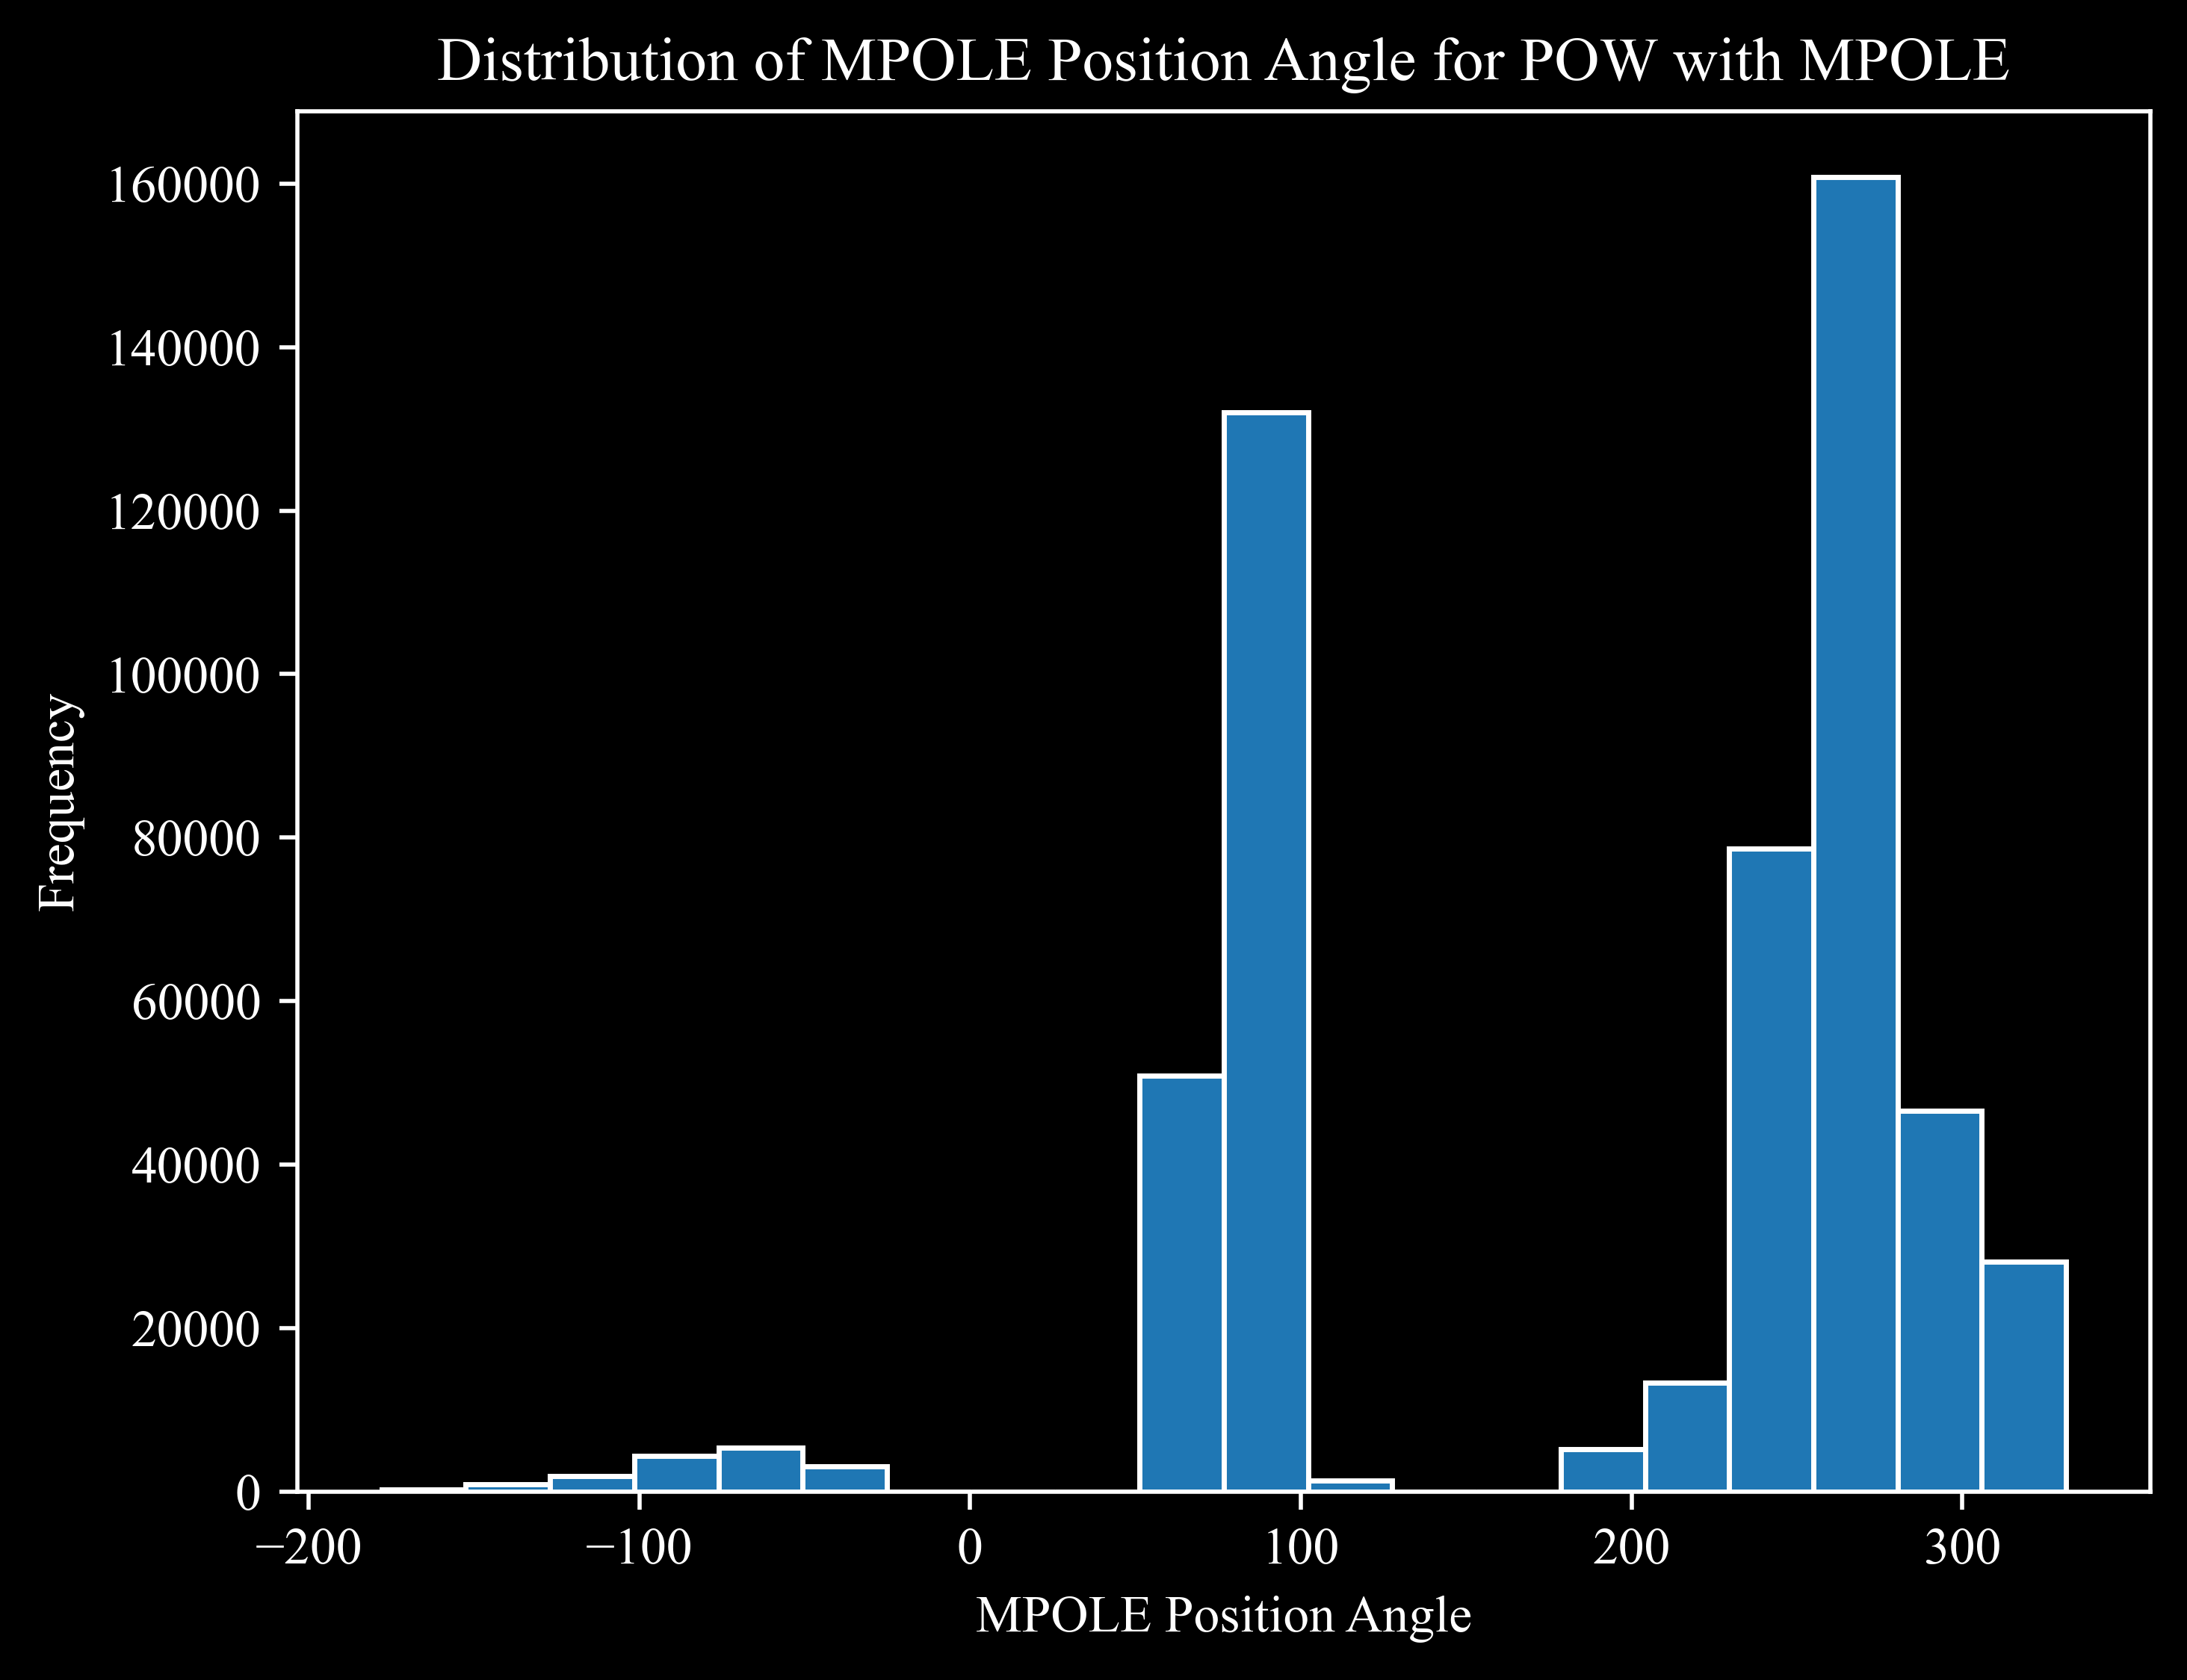

In [16]:
plt.hist(filtered_df['t_mpole_pa'], bins=20, edgecolor='w')
plt.xlabel('MPOLE Position Angle', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of MPOLE Position Angle for POW with MPOLE')
plt.show()

In [17]:
aligned_pa = (filtered_df['t_mpole_pa'] > 100) & (filtered_df['t_mpole_pa'] < 200)
num_aligned = len(filtered_df[aligned_pa])
print(f"Number of aligned MPOLE position angles: {num_aligned}")
anti_aligned_pa = (filtered_df['t_mpole_pa'] < 0) | (filtered_df['t_mpole_pa'] > 200)
print(f"Number of anti-aligned MPOLE position angles: {len(filtered_df[anti_aligned_pa])}")

# Percentage
percentage_aligned = (num_aligned / len(filtered_df)) * 100
print(f"Percentage of aligned MPOLE position angles: {percentage_aligned:.2f}%")
percentage_anti_aligned = (len(filtered_df[anti_aligned_pa]) / len(filtered_df)) * 100
print(f"Percentage of anti-aligned MPOLE position angles: {percentage_anti_aligned:.2f}%")

Number of aligned MPOLE position angles: 5775
Number of anti-aligned MPOLE position angles: 344735
Percentage of aligned MPOLE position angles: 1.08%
Percentage of anti-aligned MPOLE position angles: 64.73%


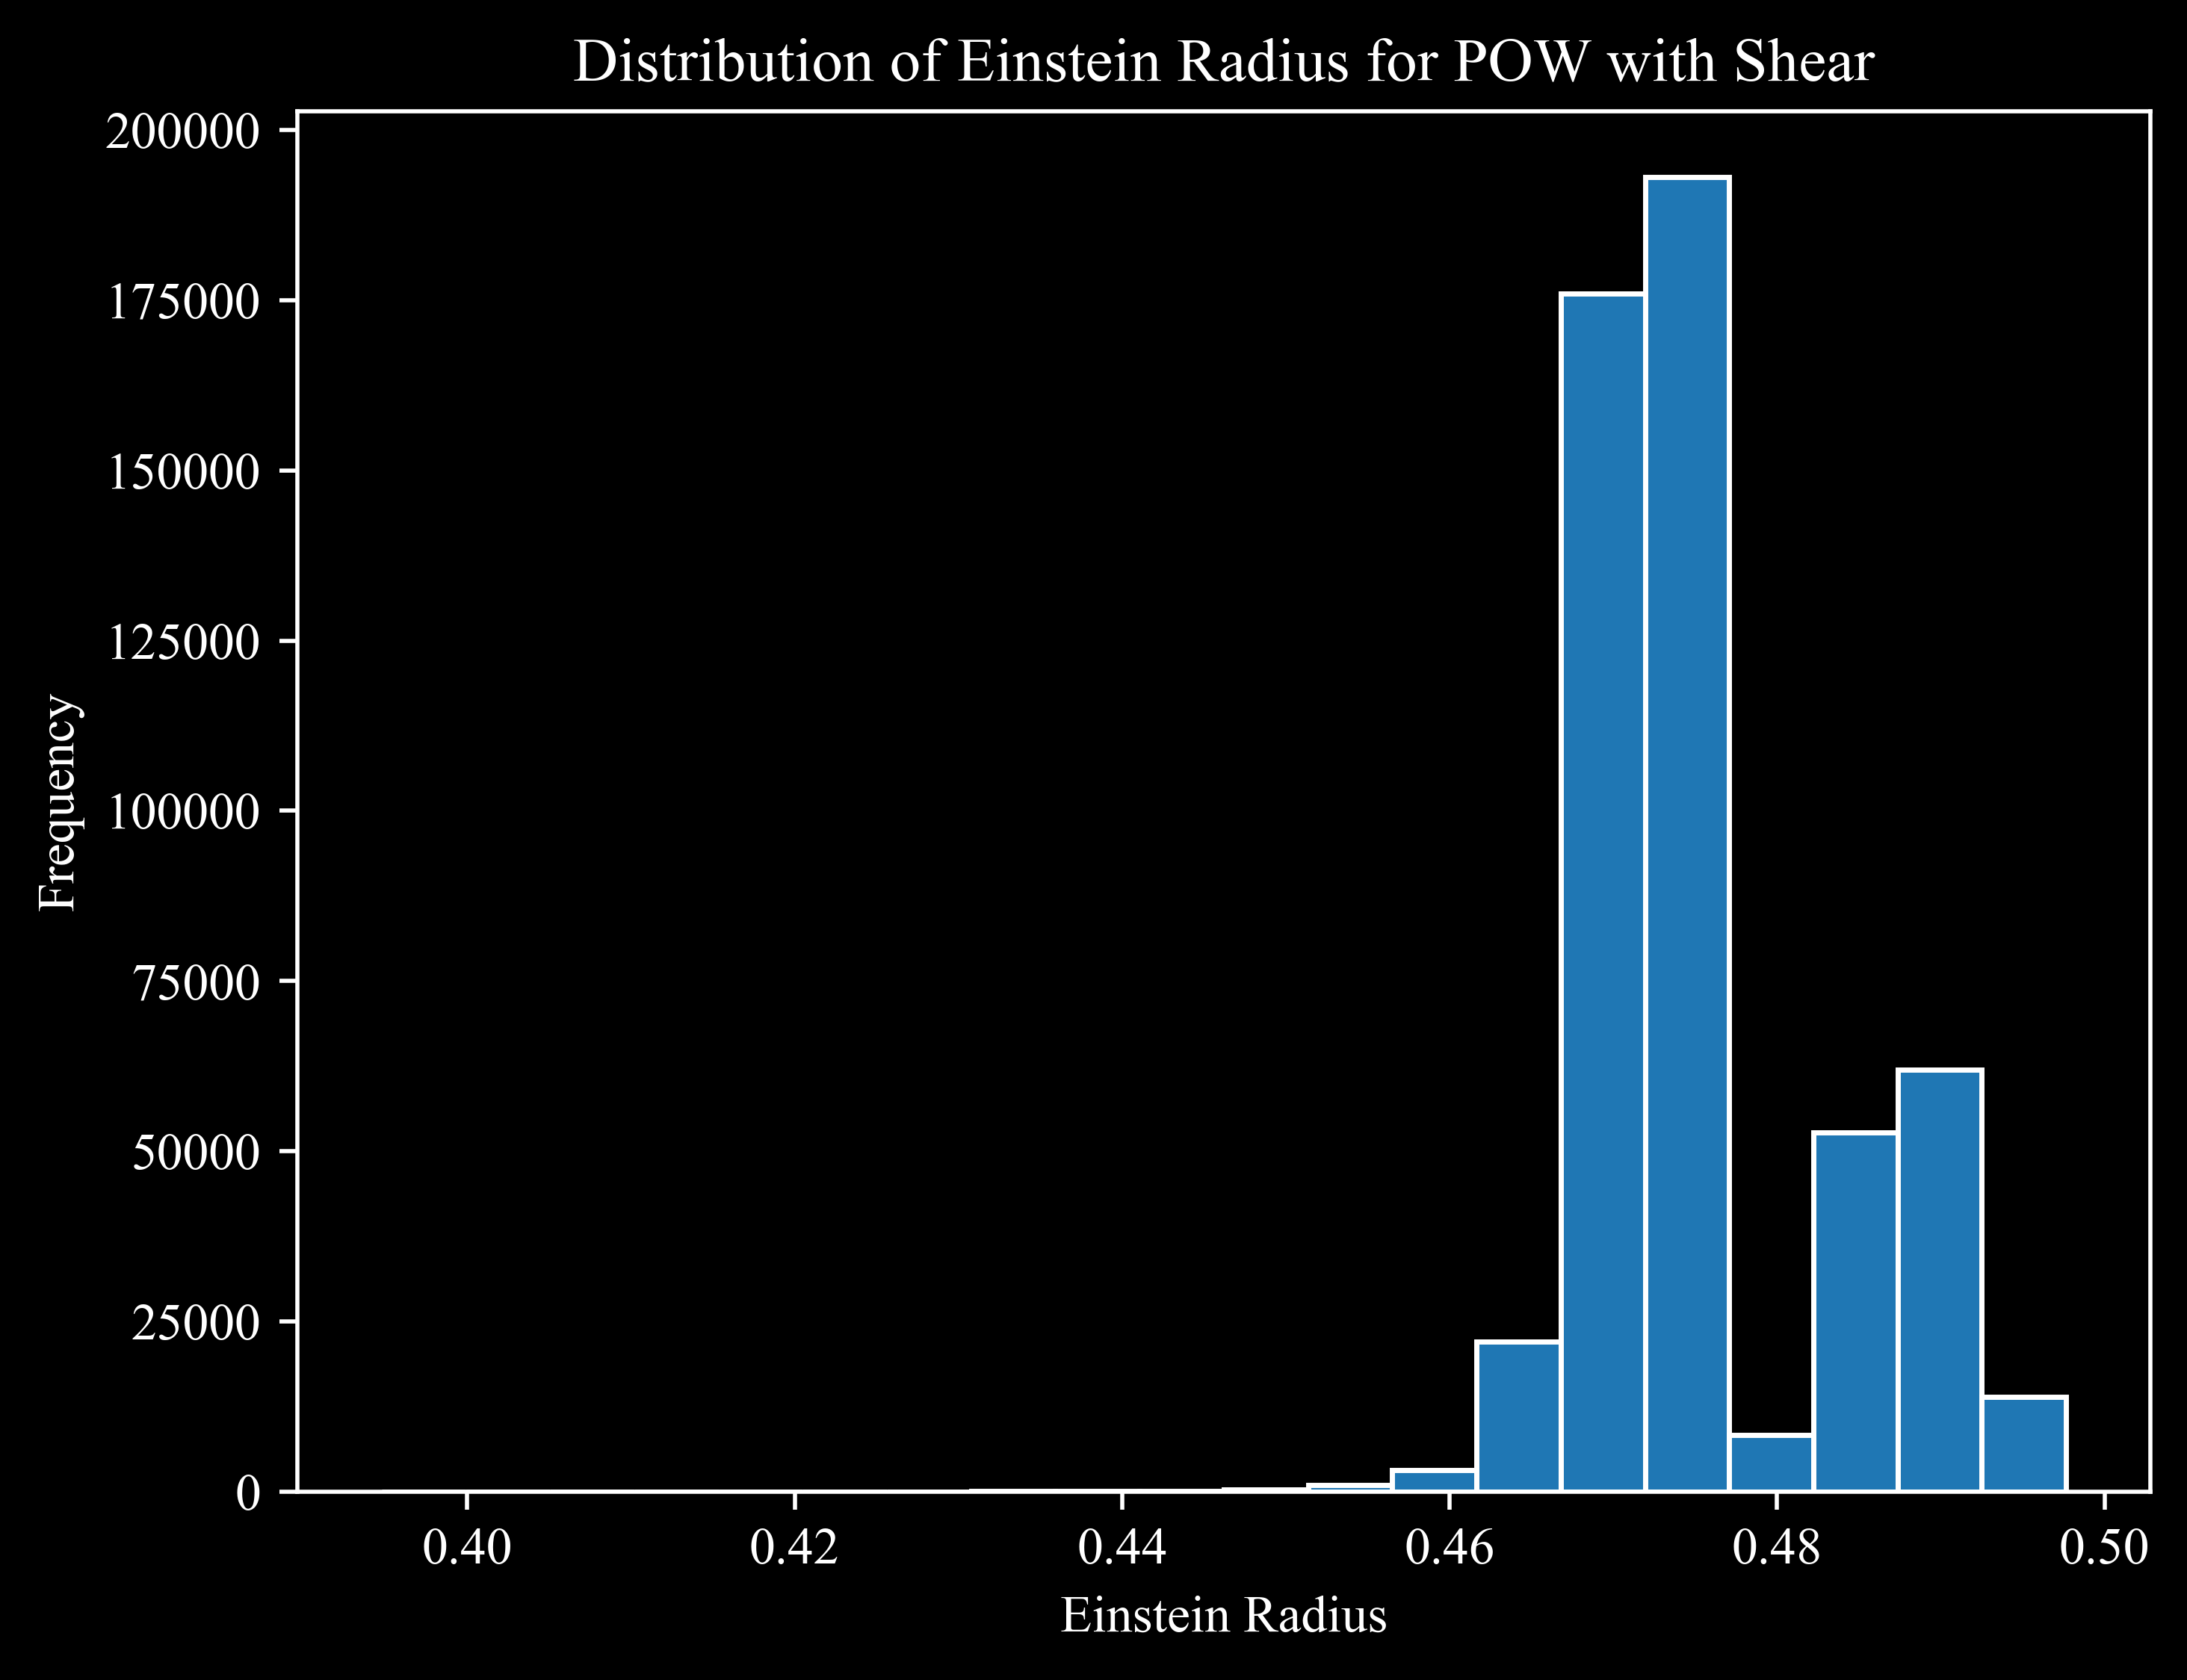

In [19]:
plt.hist(filtered_df['r_ein'], bins=20, edgecolor='w')
plt.xlabel('Einstein Radius', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of Einstein Radius for POW with Shear')
plt.show()

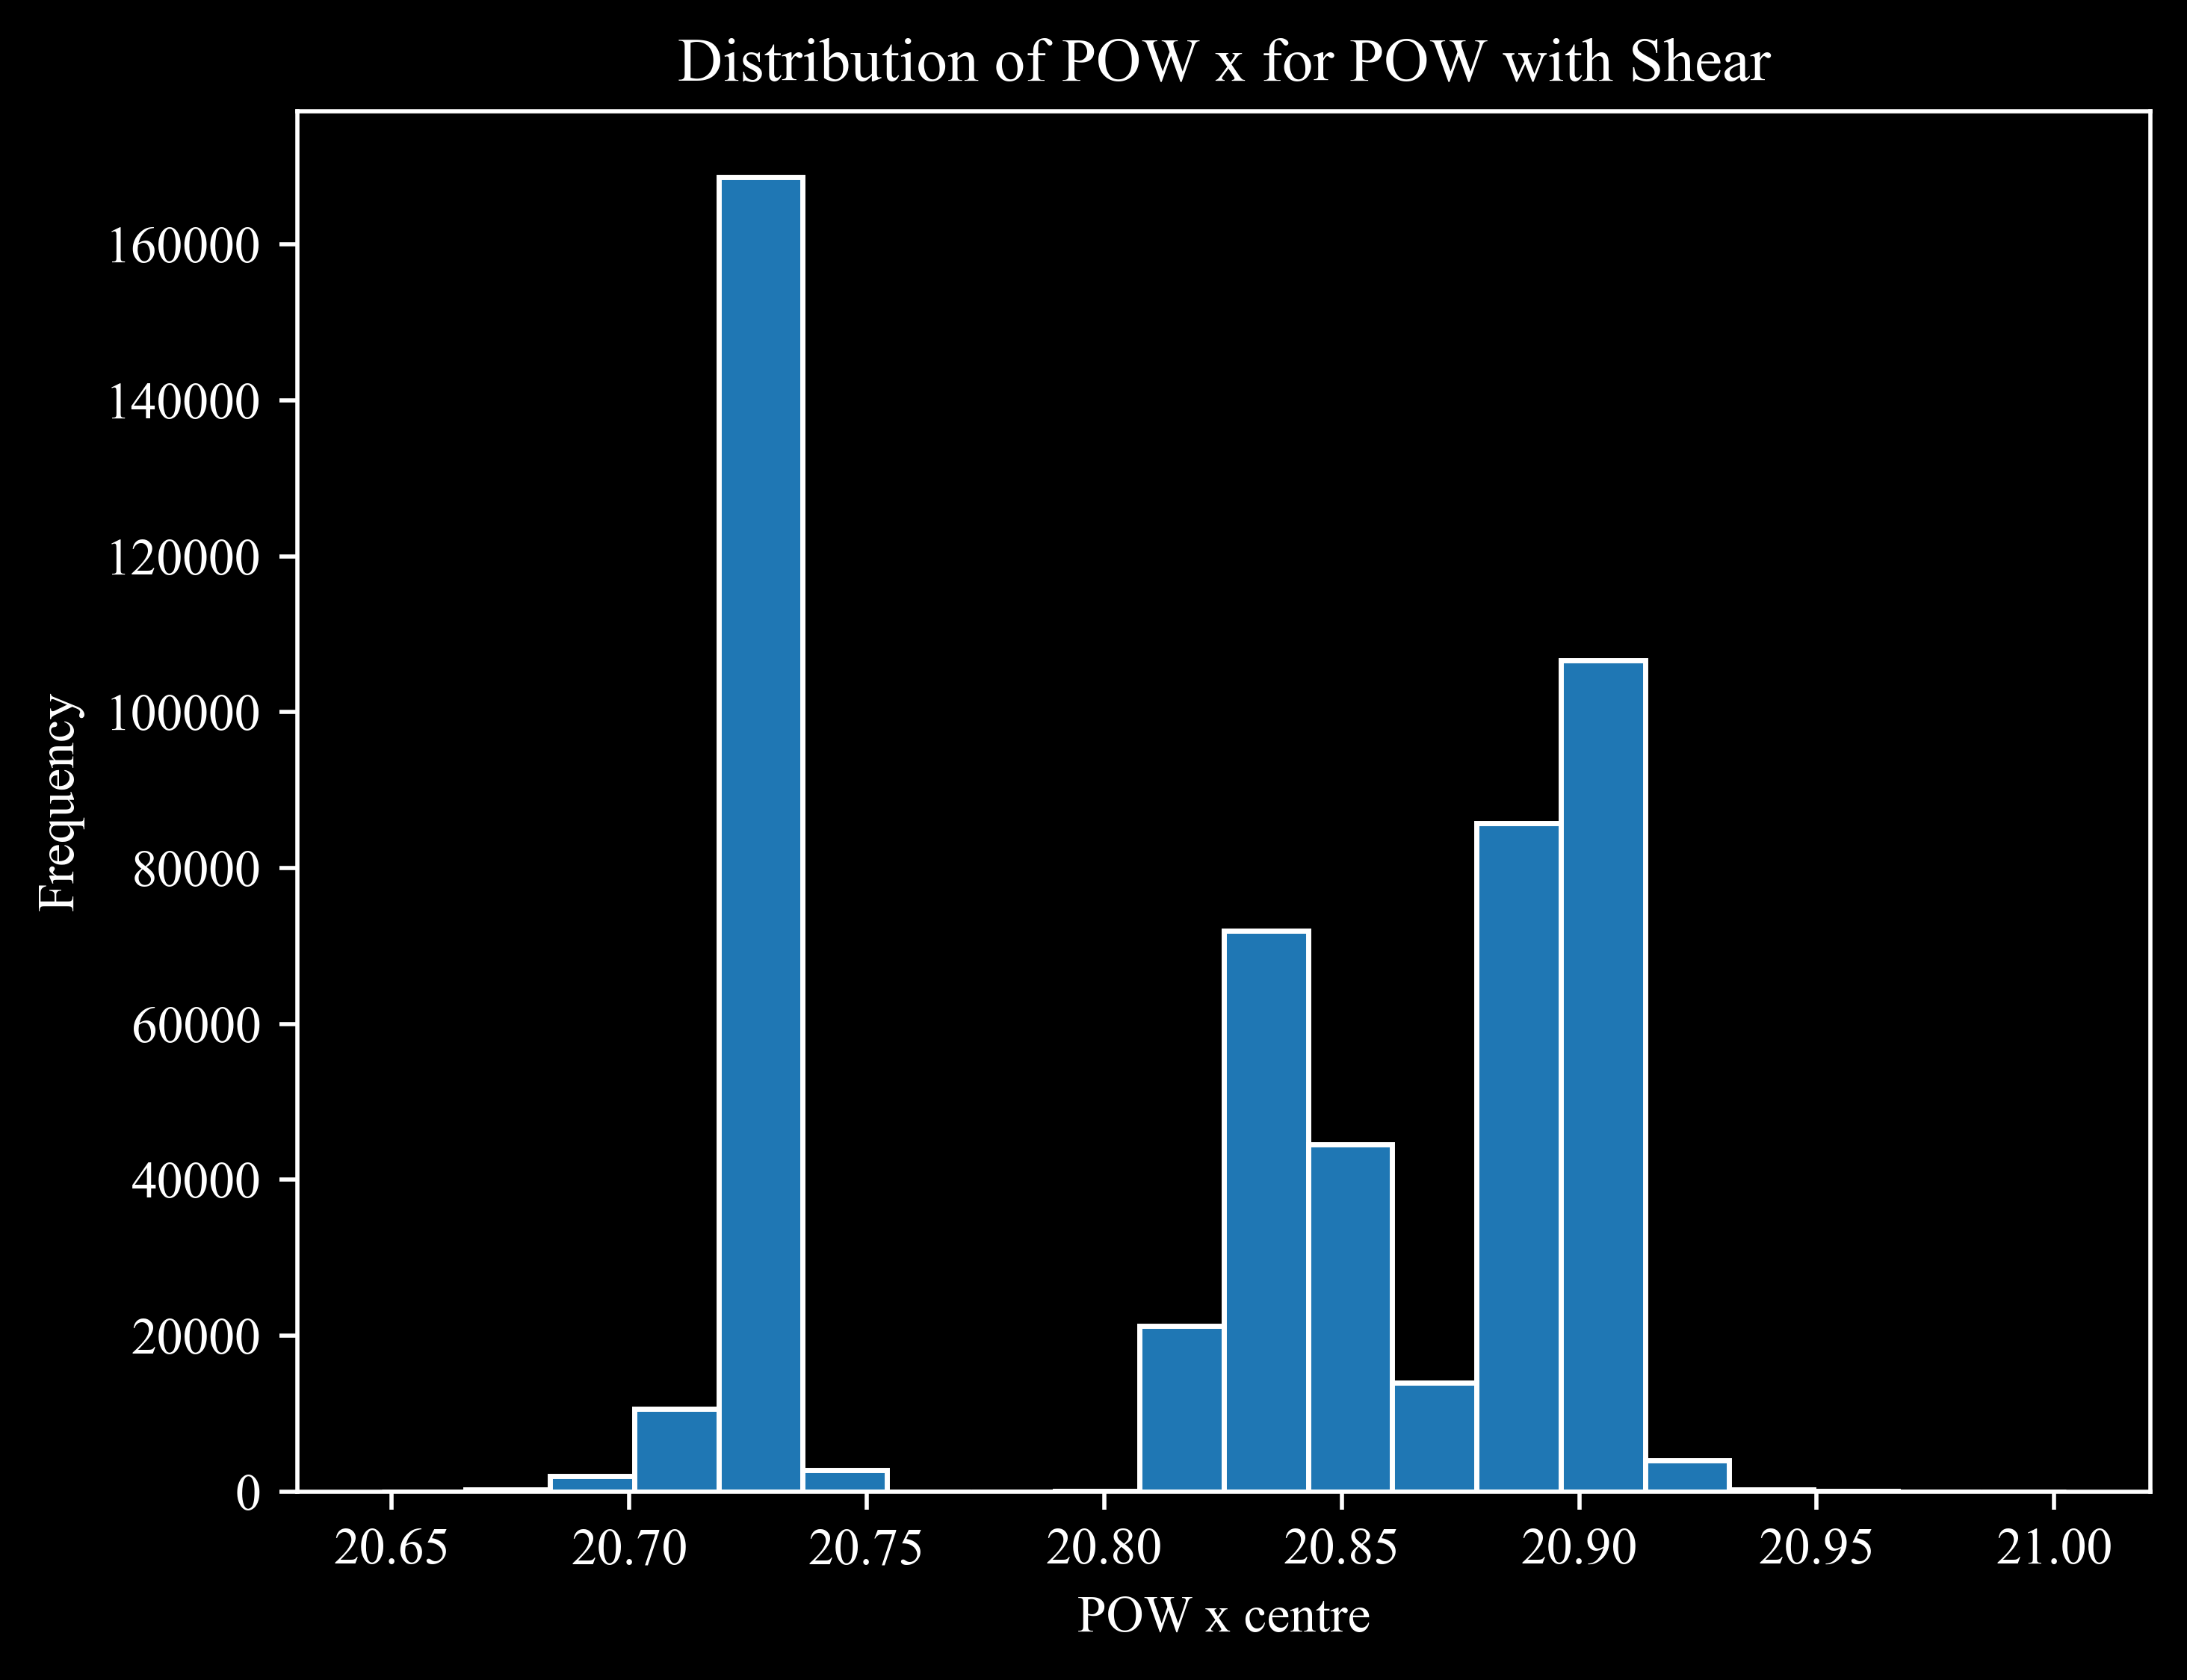

In [ ]:
plt.hist(filtered_df['x'], bins=20, edgecolor='w')
plt.xlabel('POW x centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW x for POW with MPOLE')
plt.show()

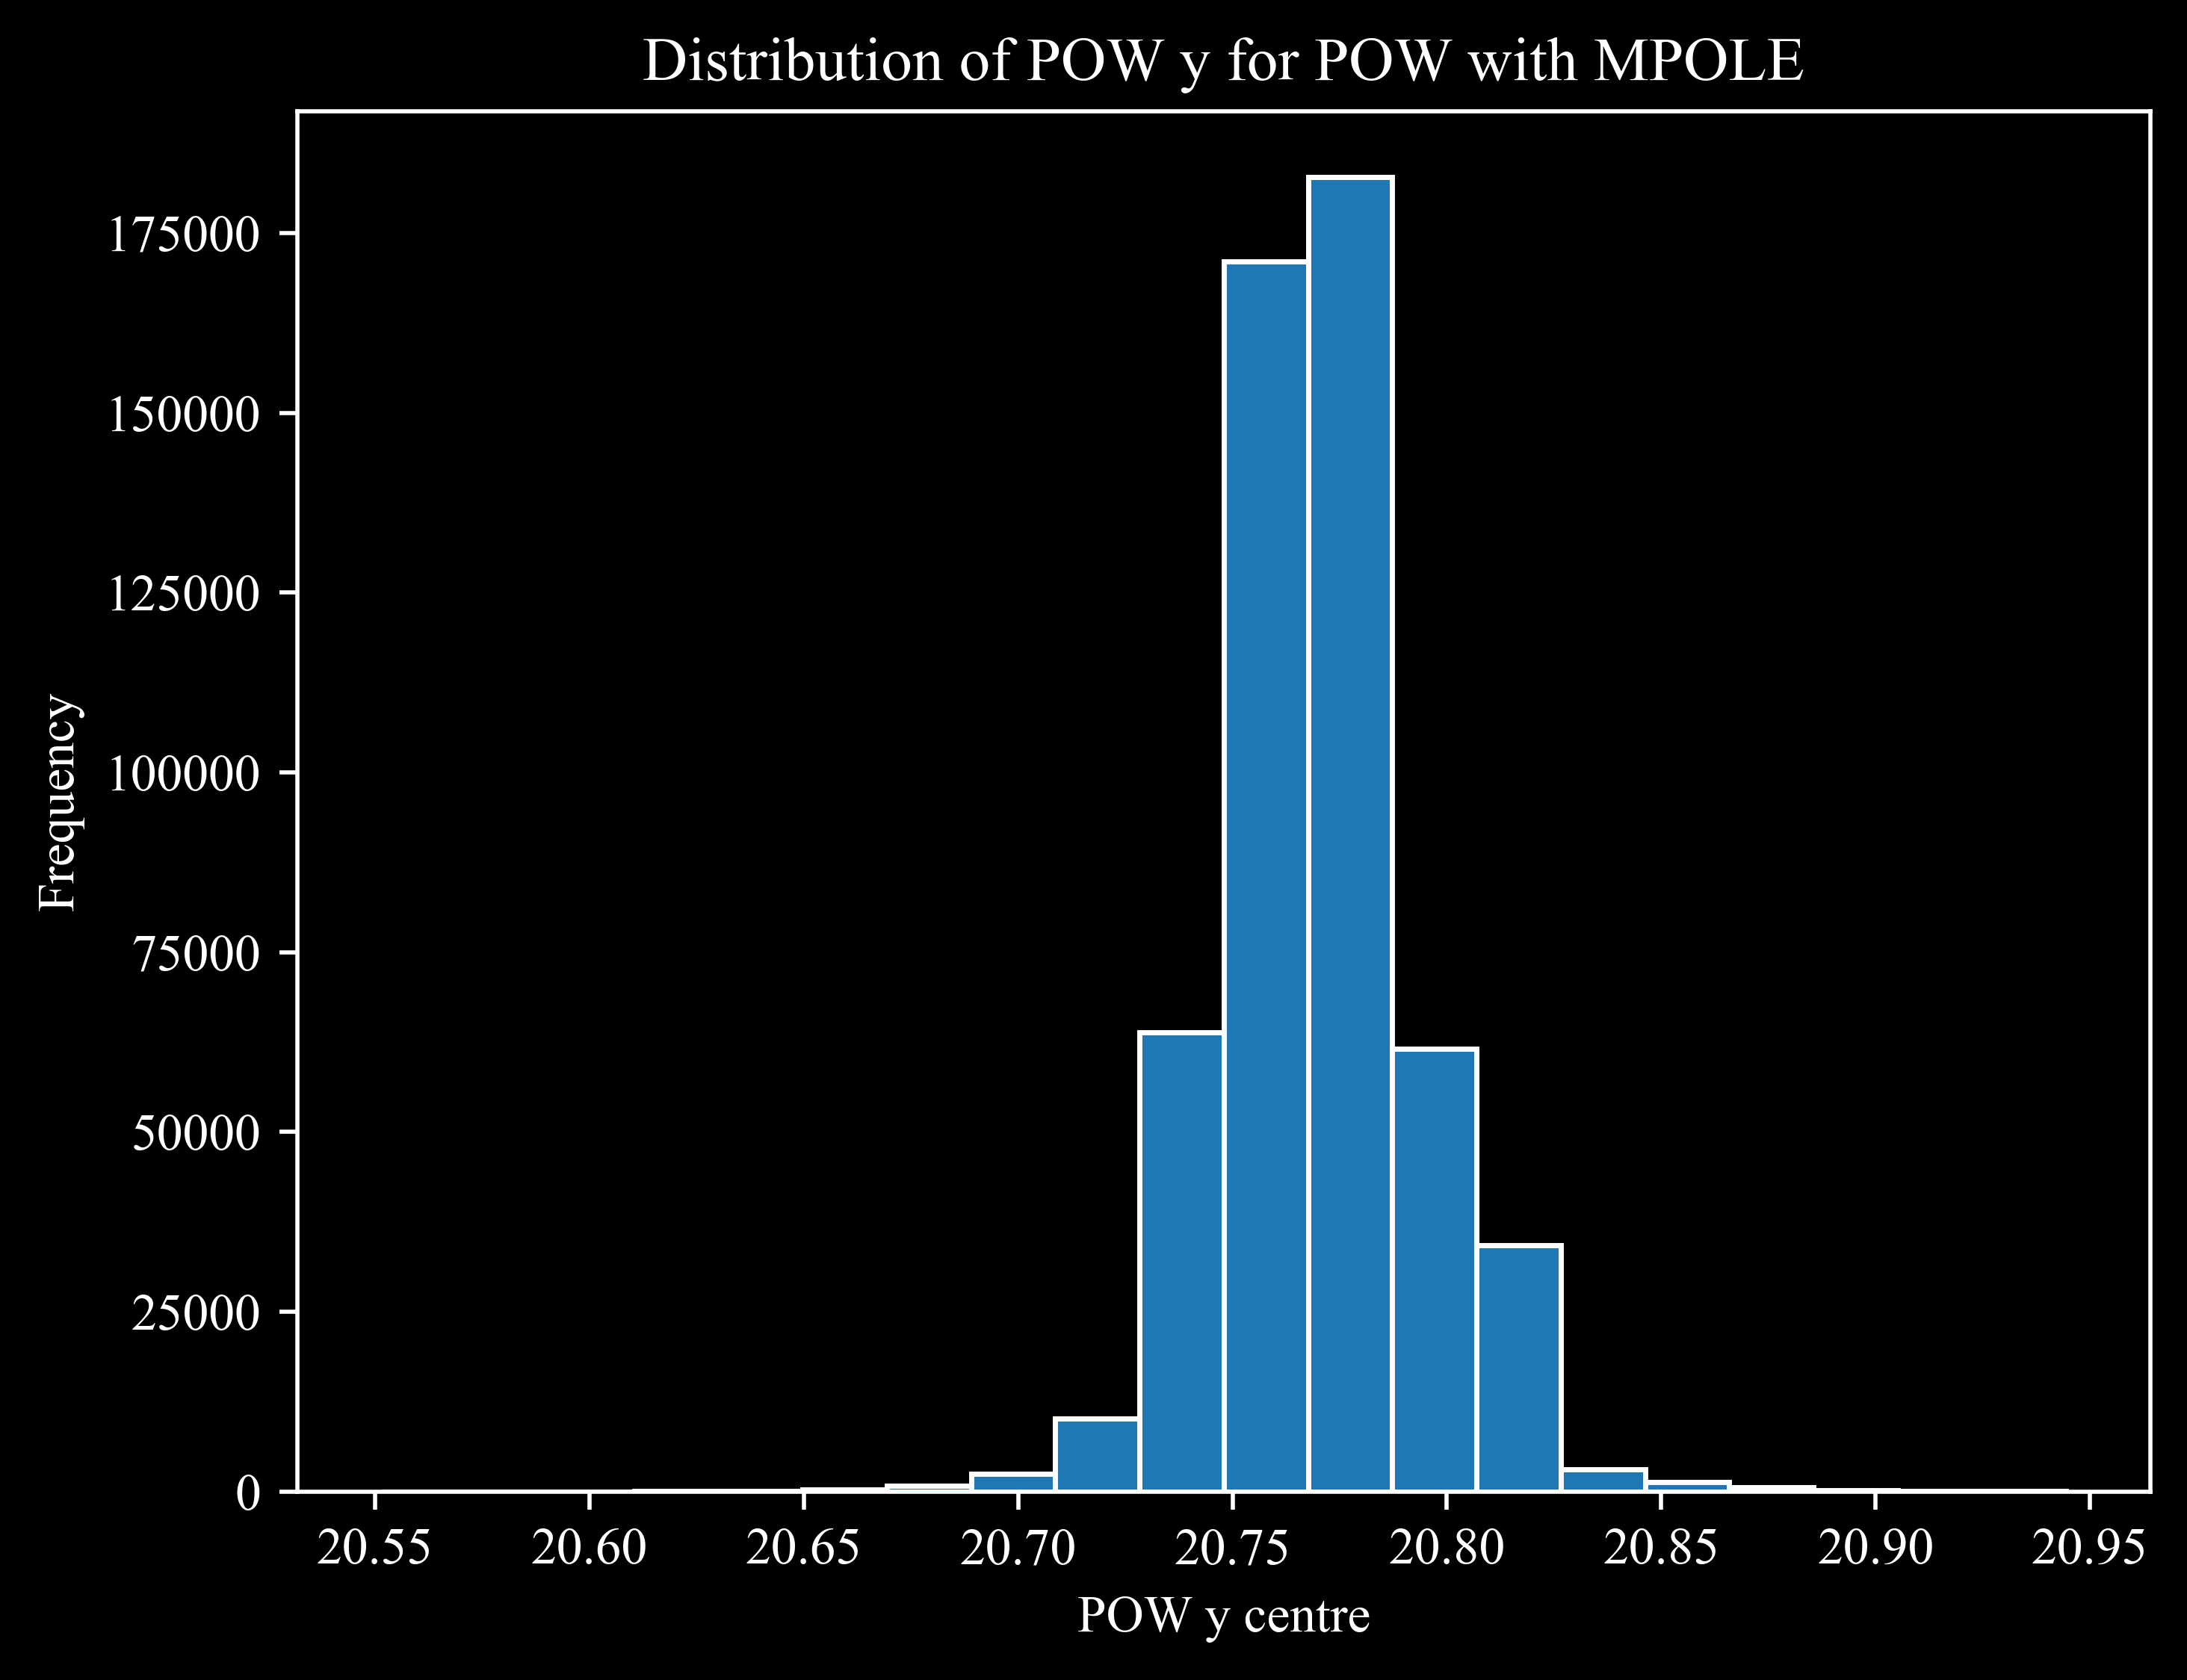

In [24]:
plt.hist(filtered_df['y'], bins=20, edgecolor='w')
plt.xlabel('POW y centre', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW y for POW with MPOLE')
plt.show()

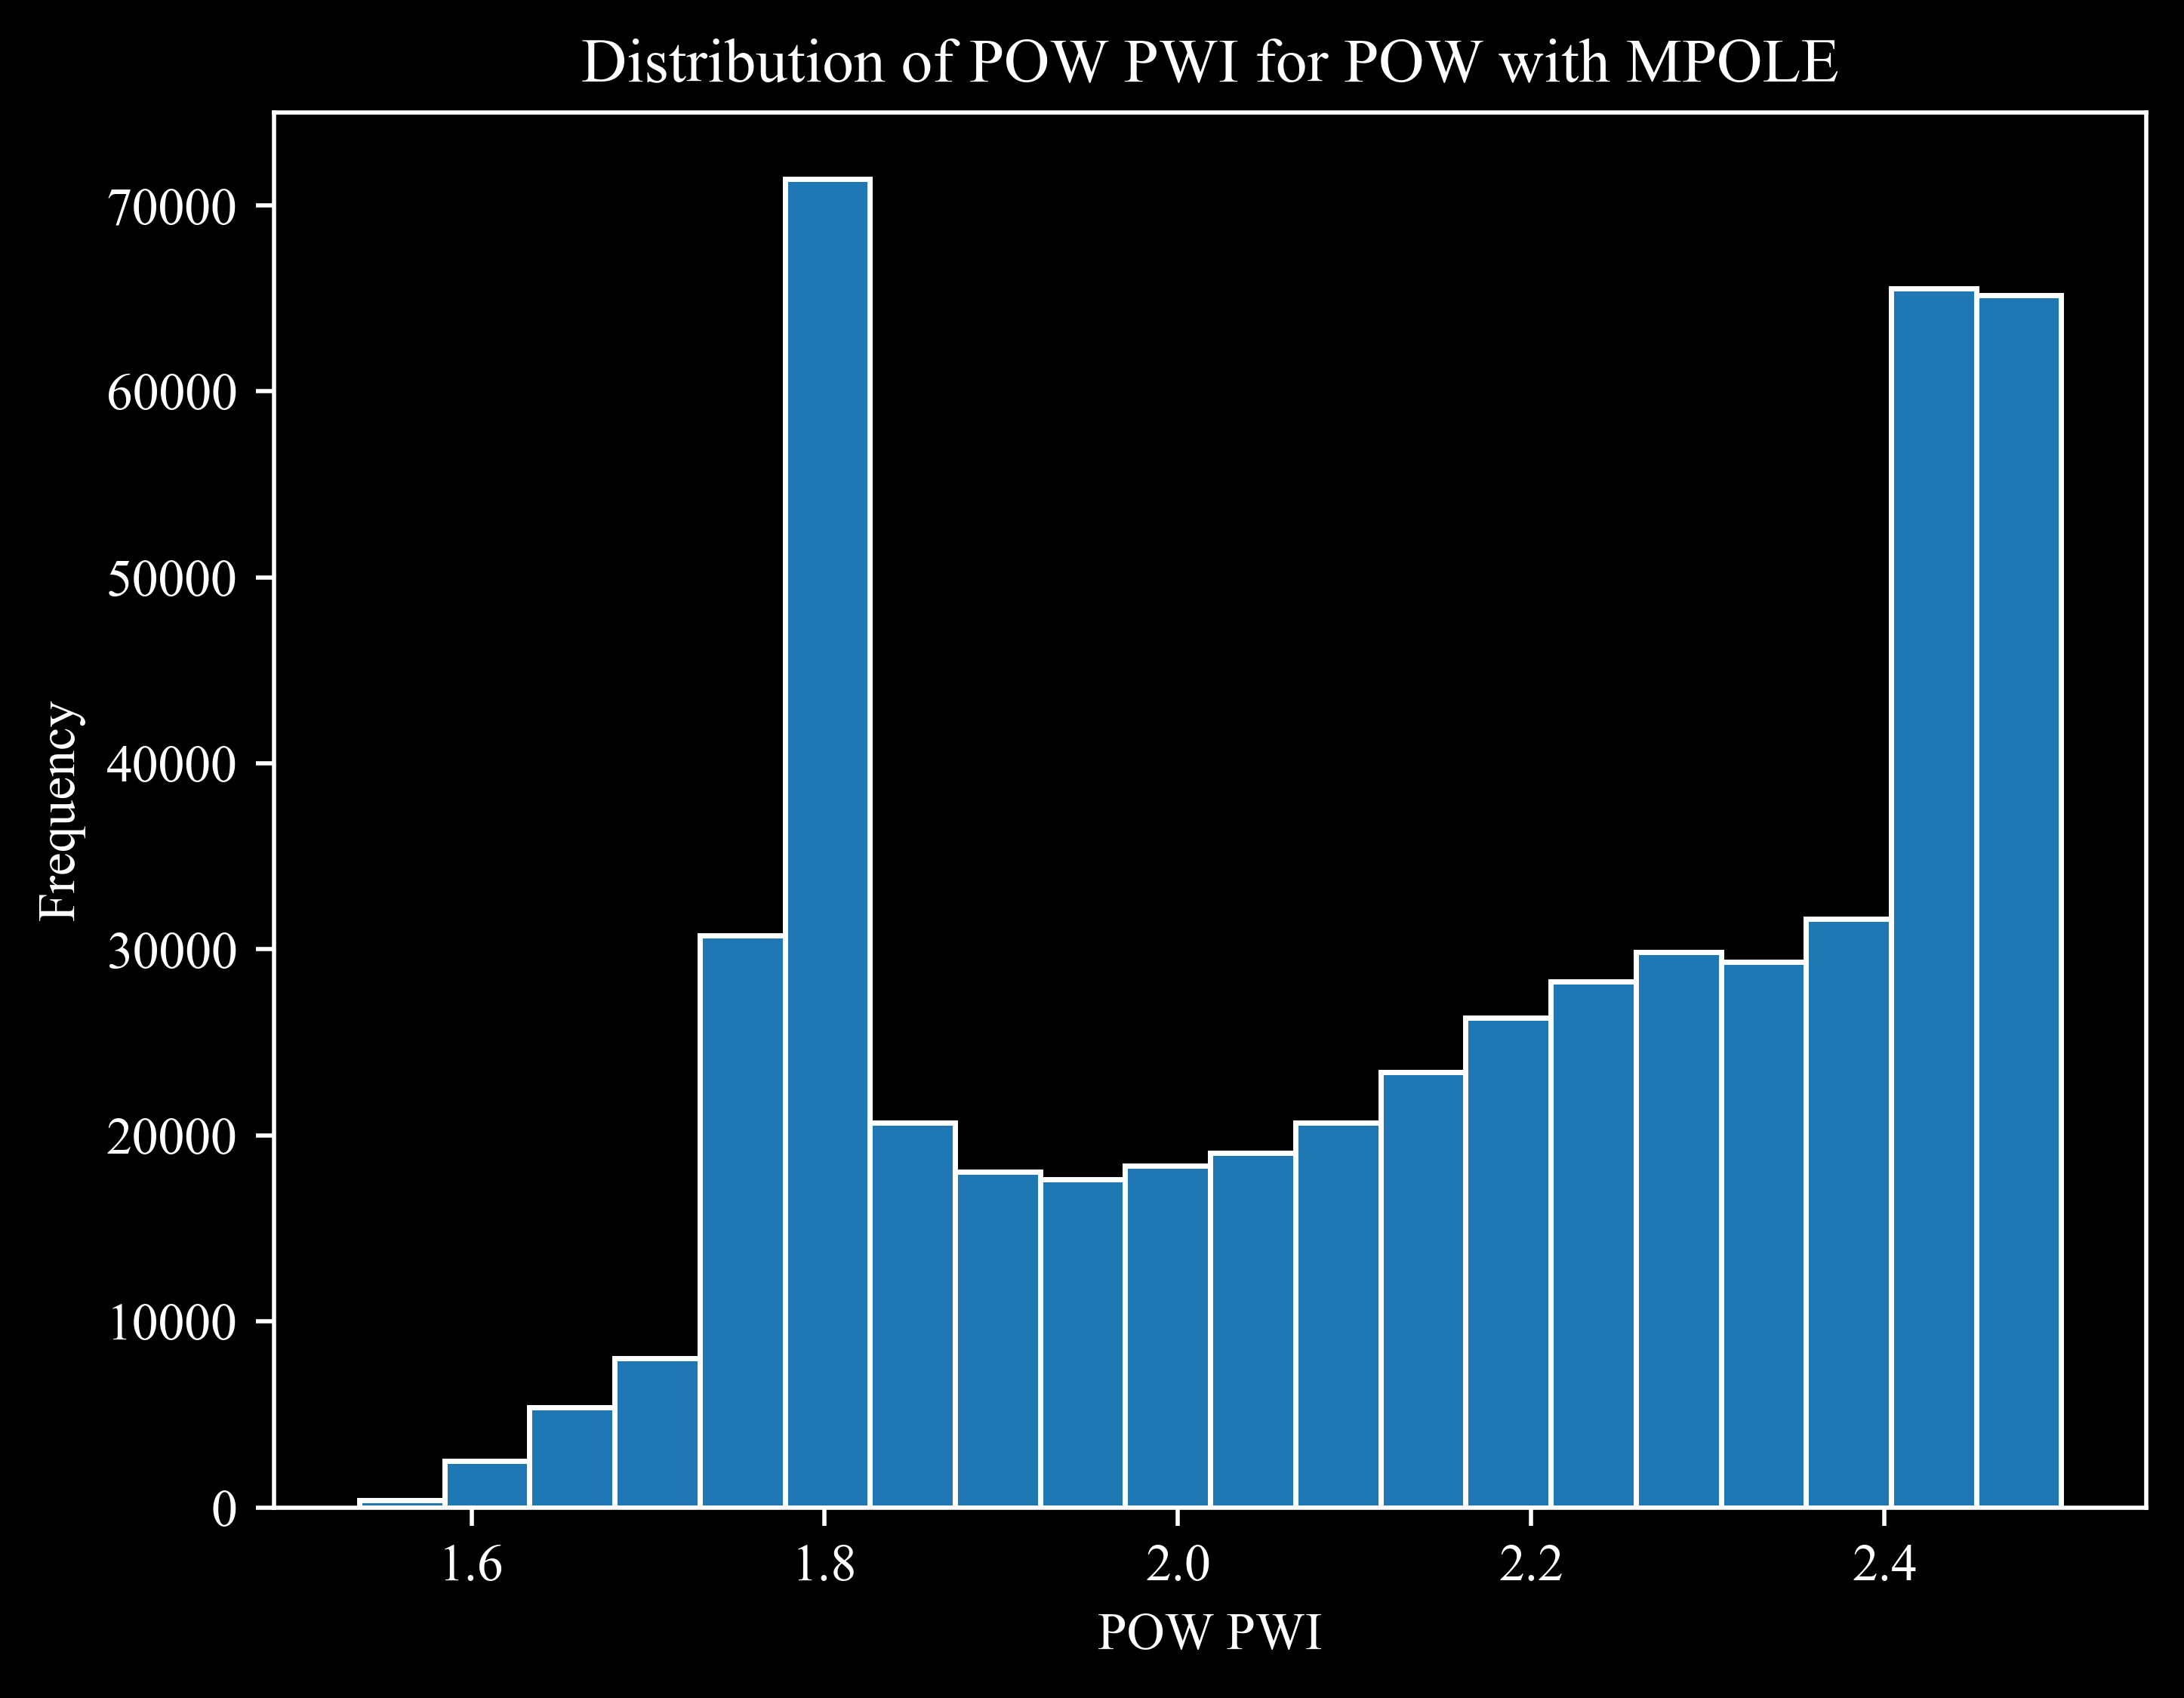

In [26]:
plt.hist(filtered_df['pwi'], bins=20, edgecolor='w')
plt.xlabel('POW PWI', color = 'w')
plt.ylabel('Frequency', color = 'w')
plt.title('Distribution of POW PWI for POW with MPOLE')
plt.show()

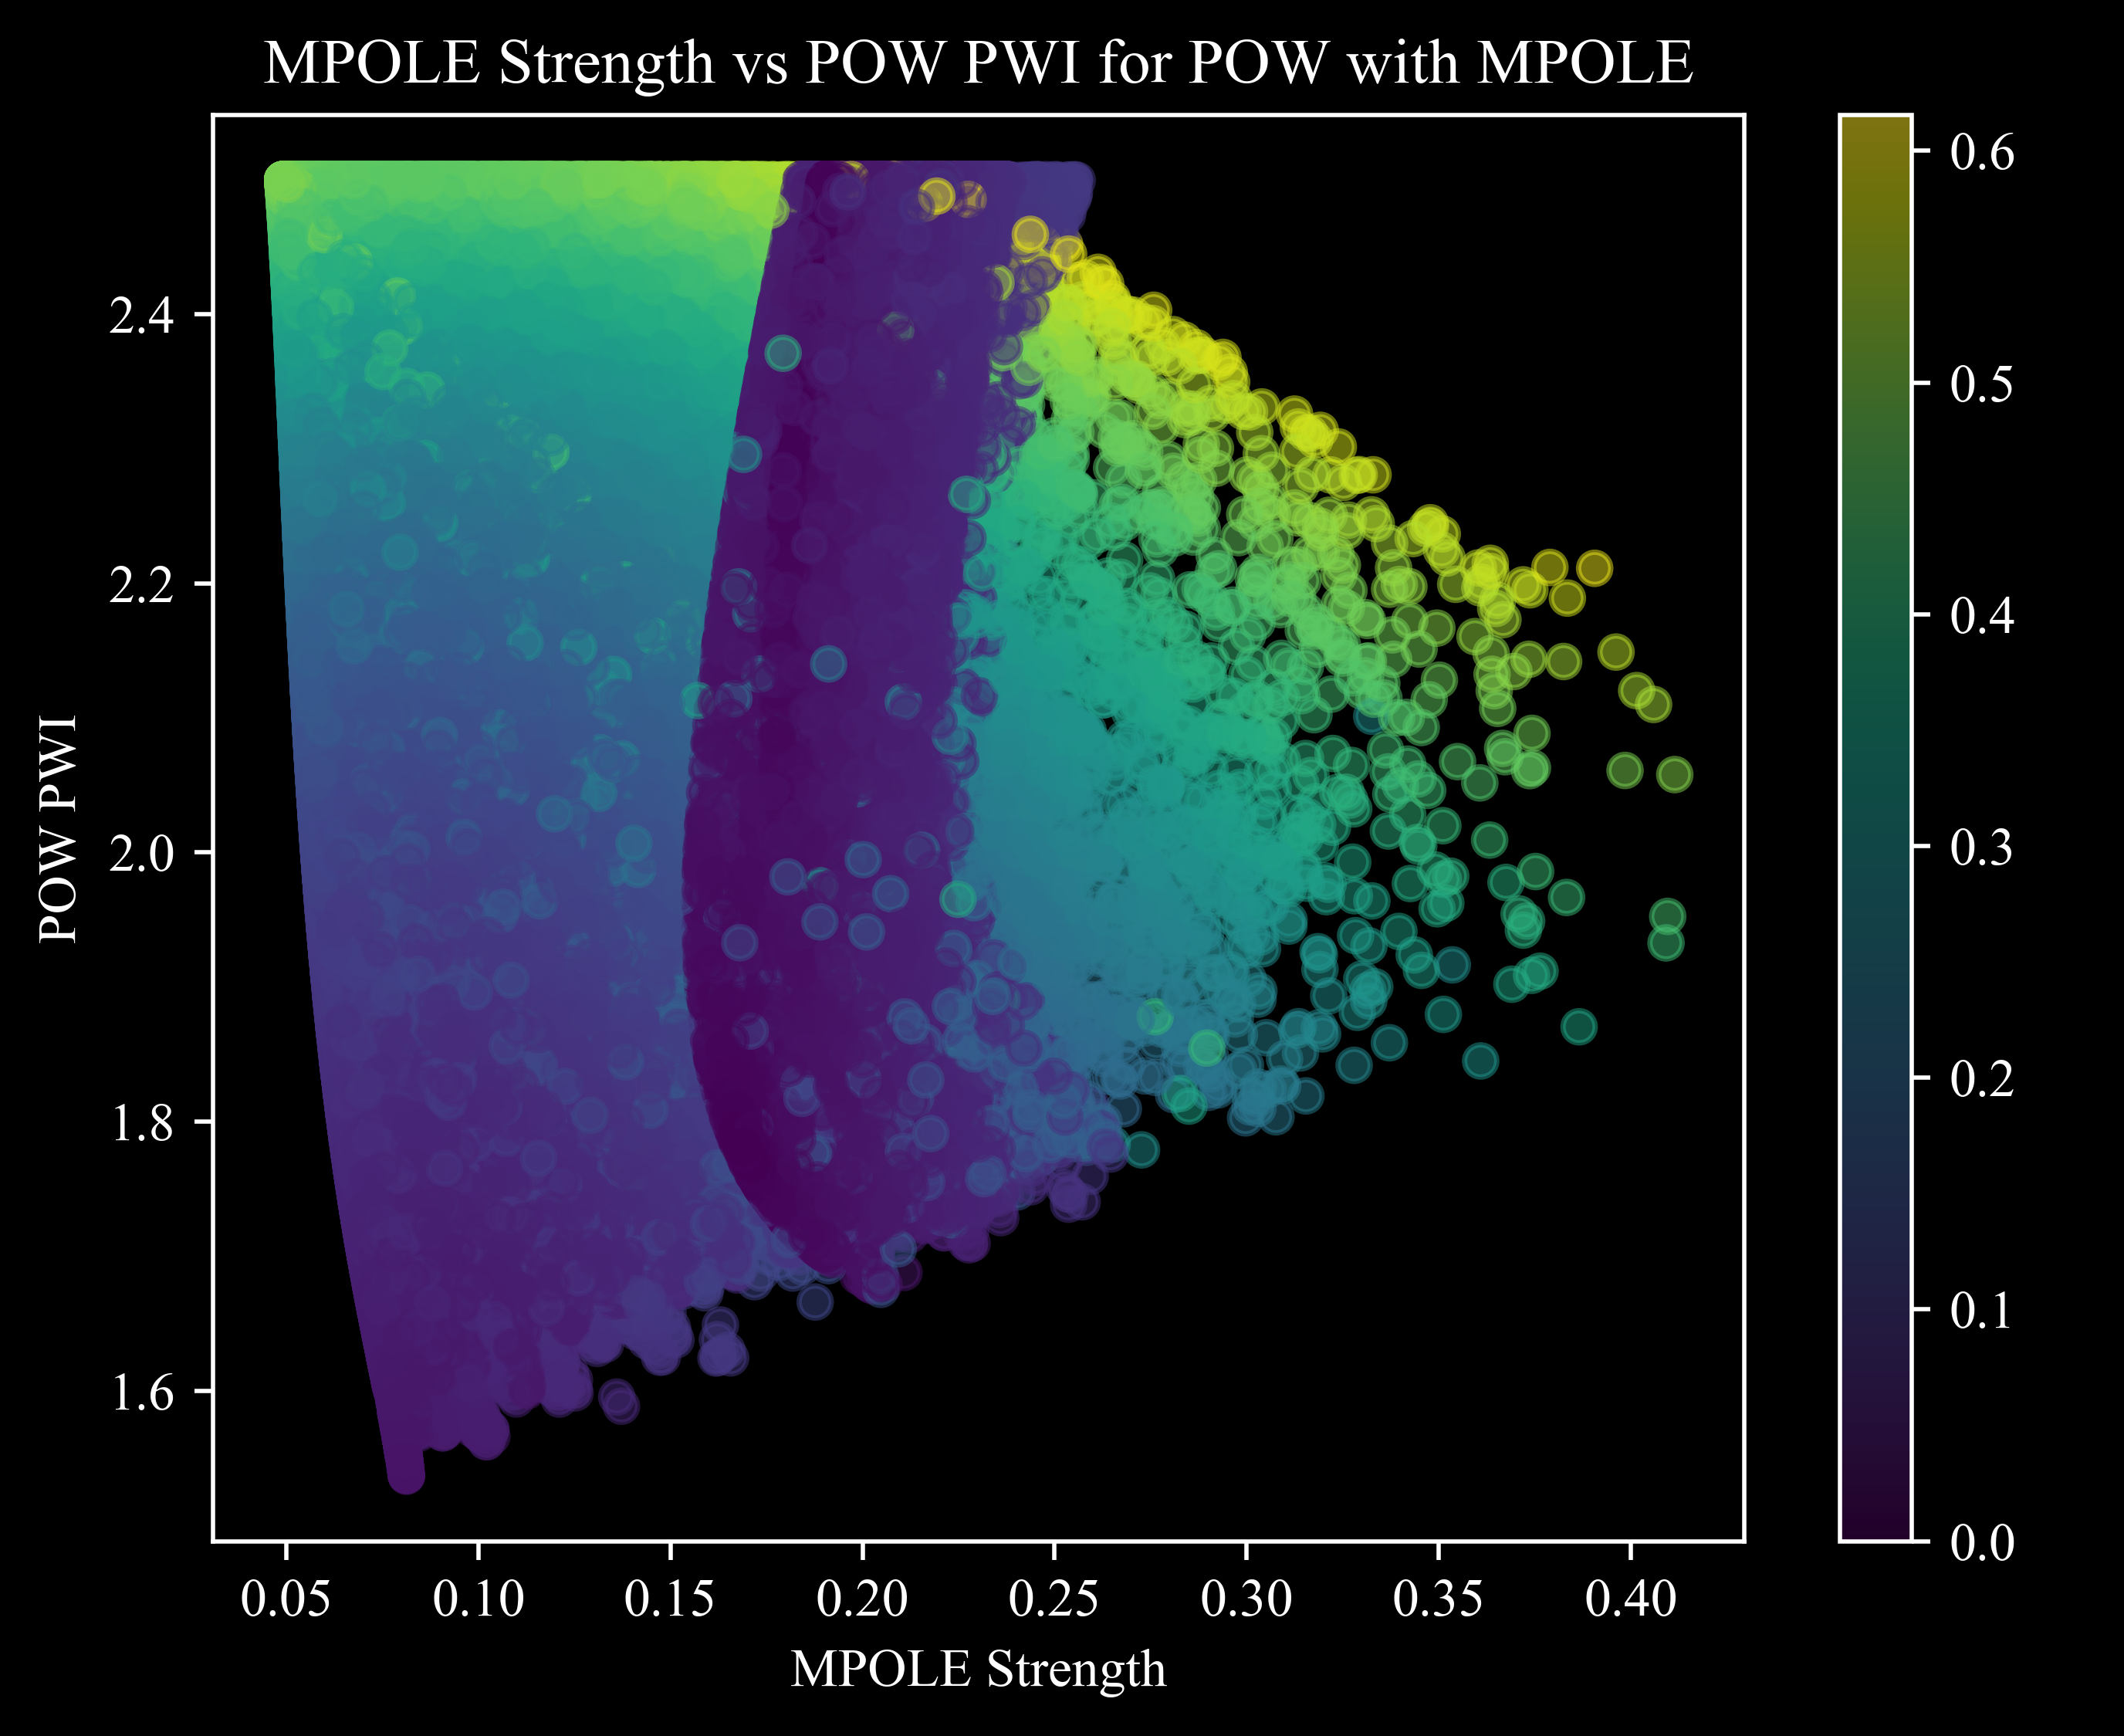

In [32]:
plt.scatter(filtered_df['t_mpole_str'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.5)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE Strength', color = 'w')
plt.ylabel('POW PWI', color = 'w')
plt.title('MPOLE Strength vs POW PWI for POW with MPOLE')
plt.show()

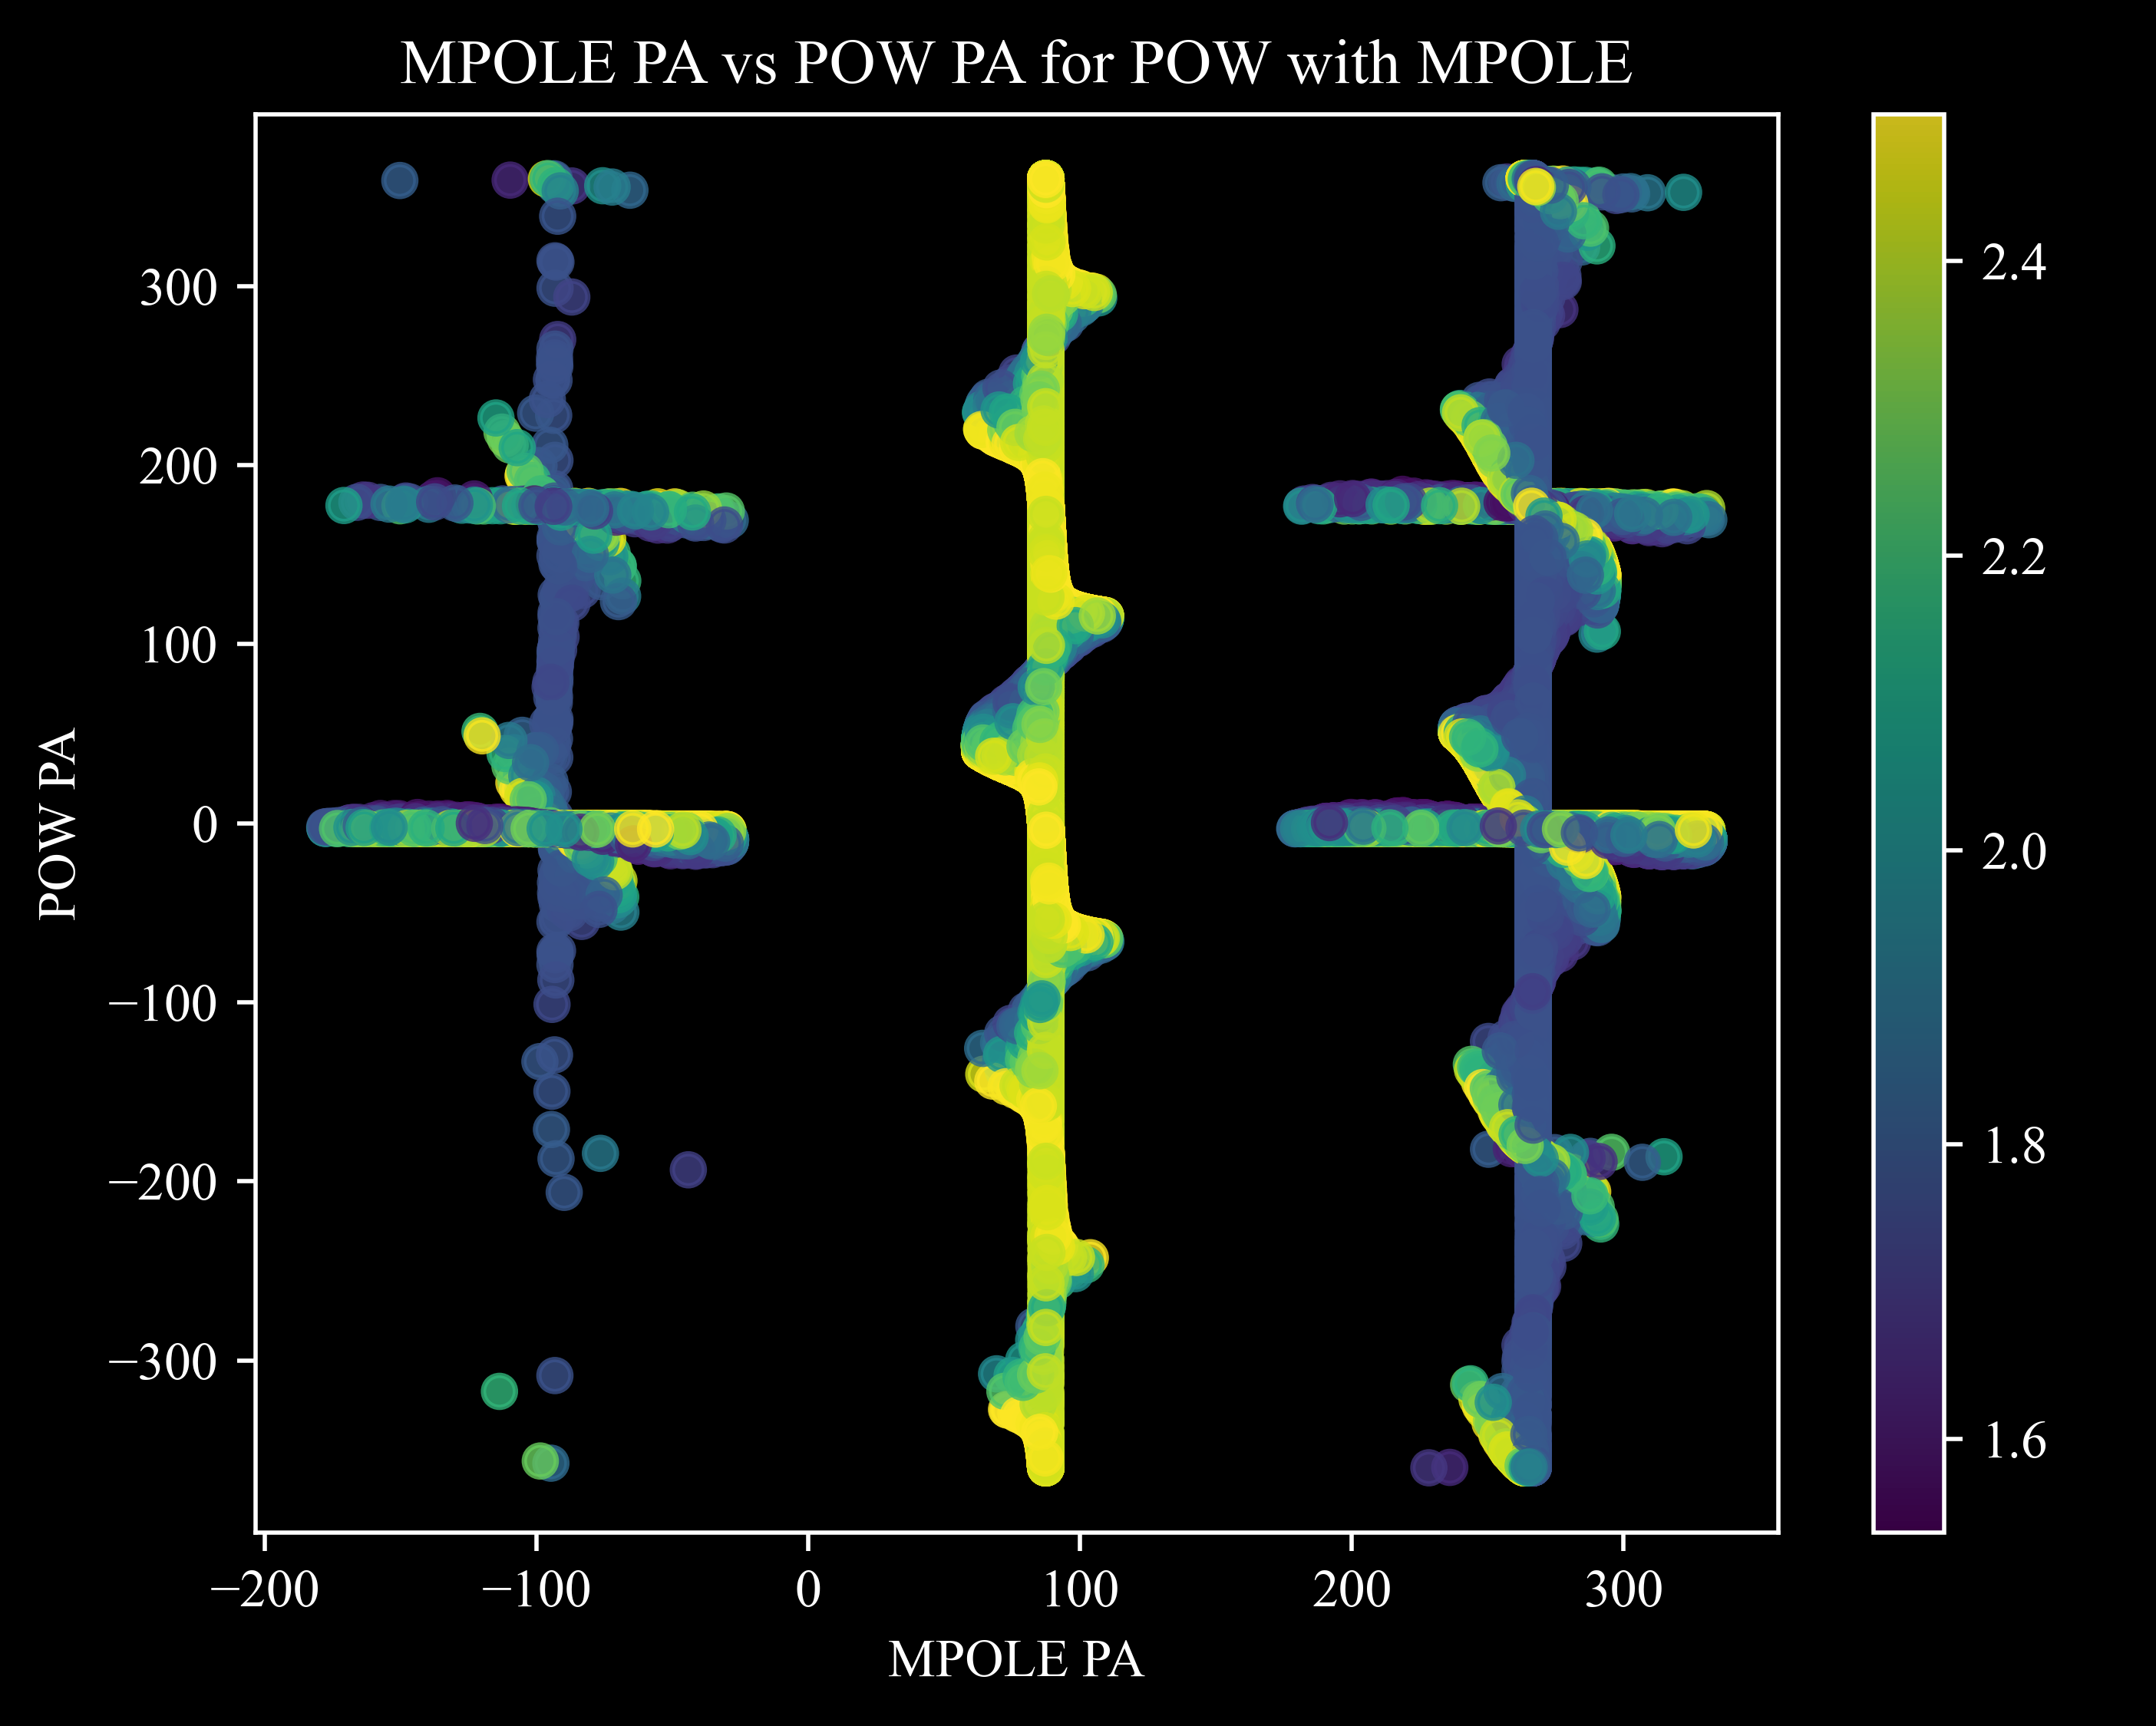

In [33]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['pow_pa'], c=filtered_df['pwi'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('POW PA', color = 'w')
plt.title('MPOLE PA vs POW PA for POW with MPOLE')
plt.show()

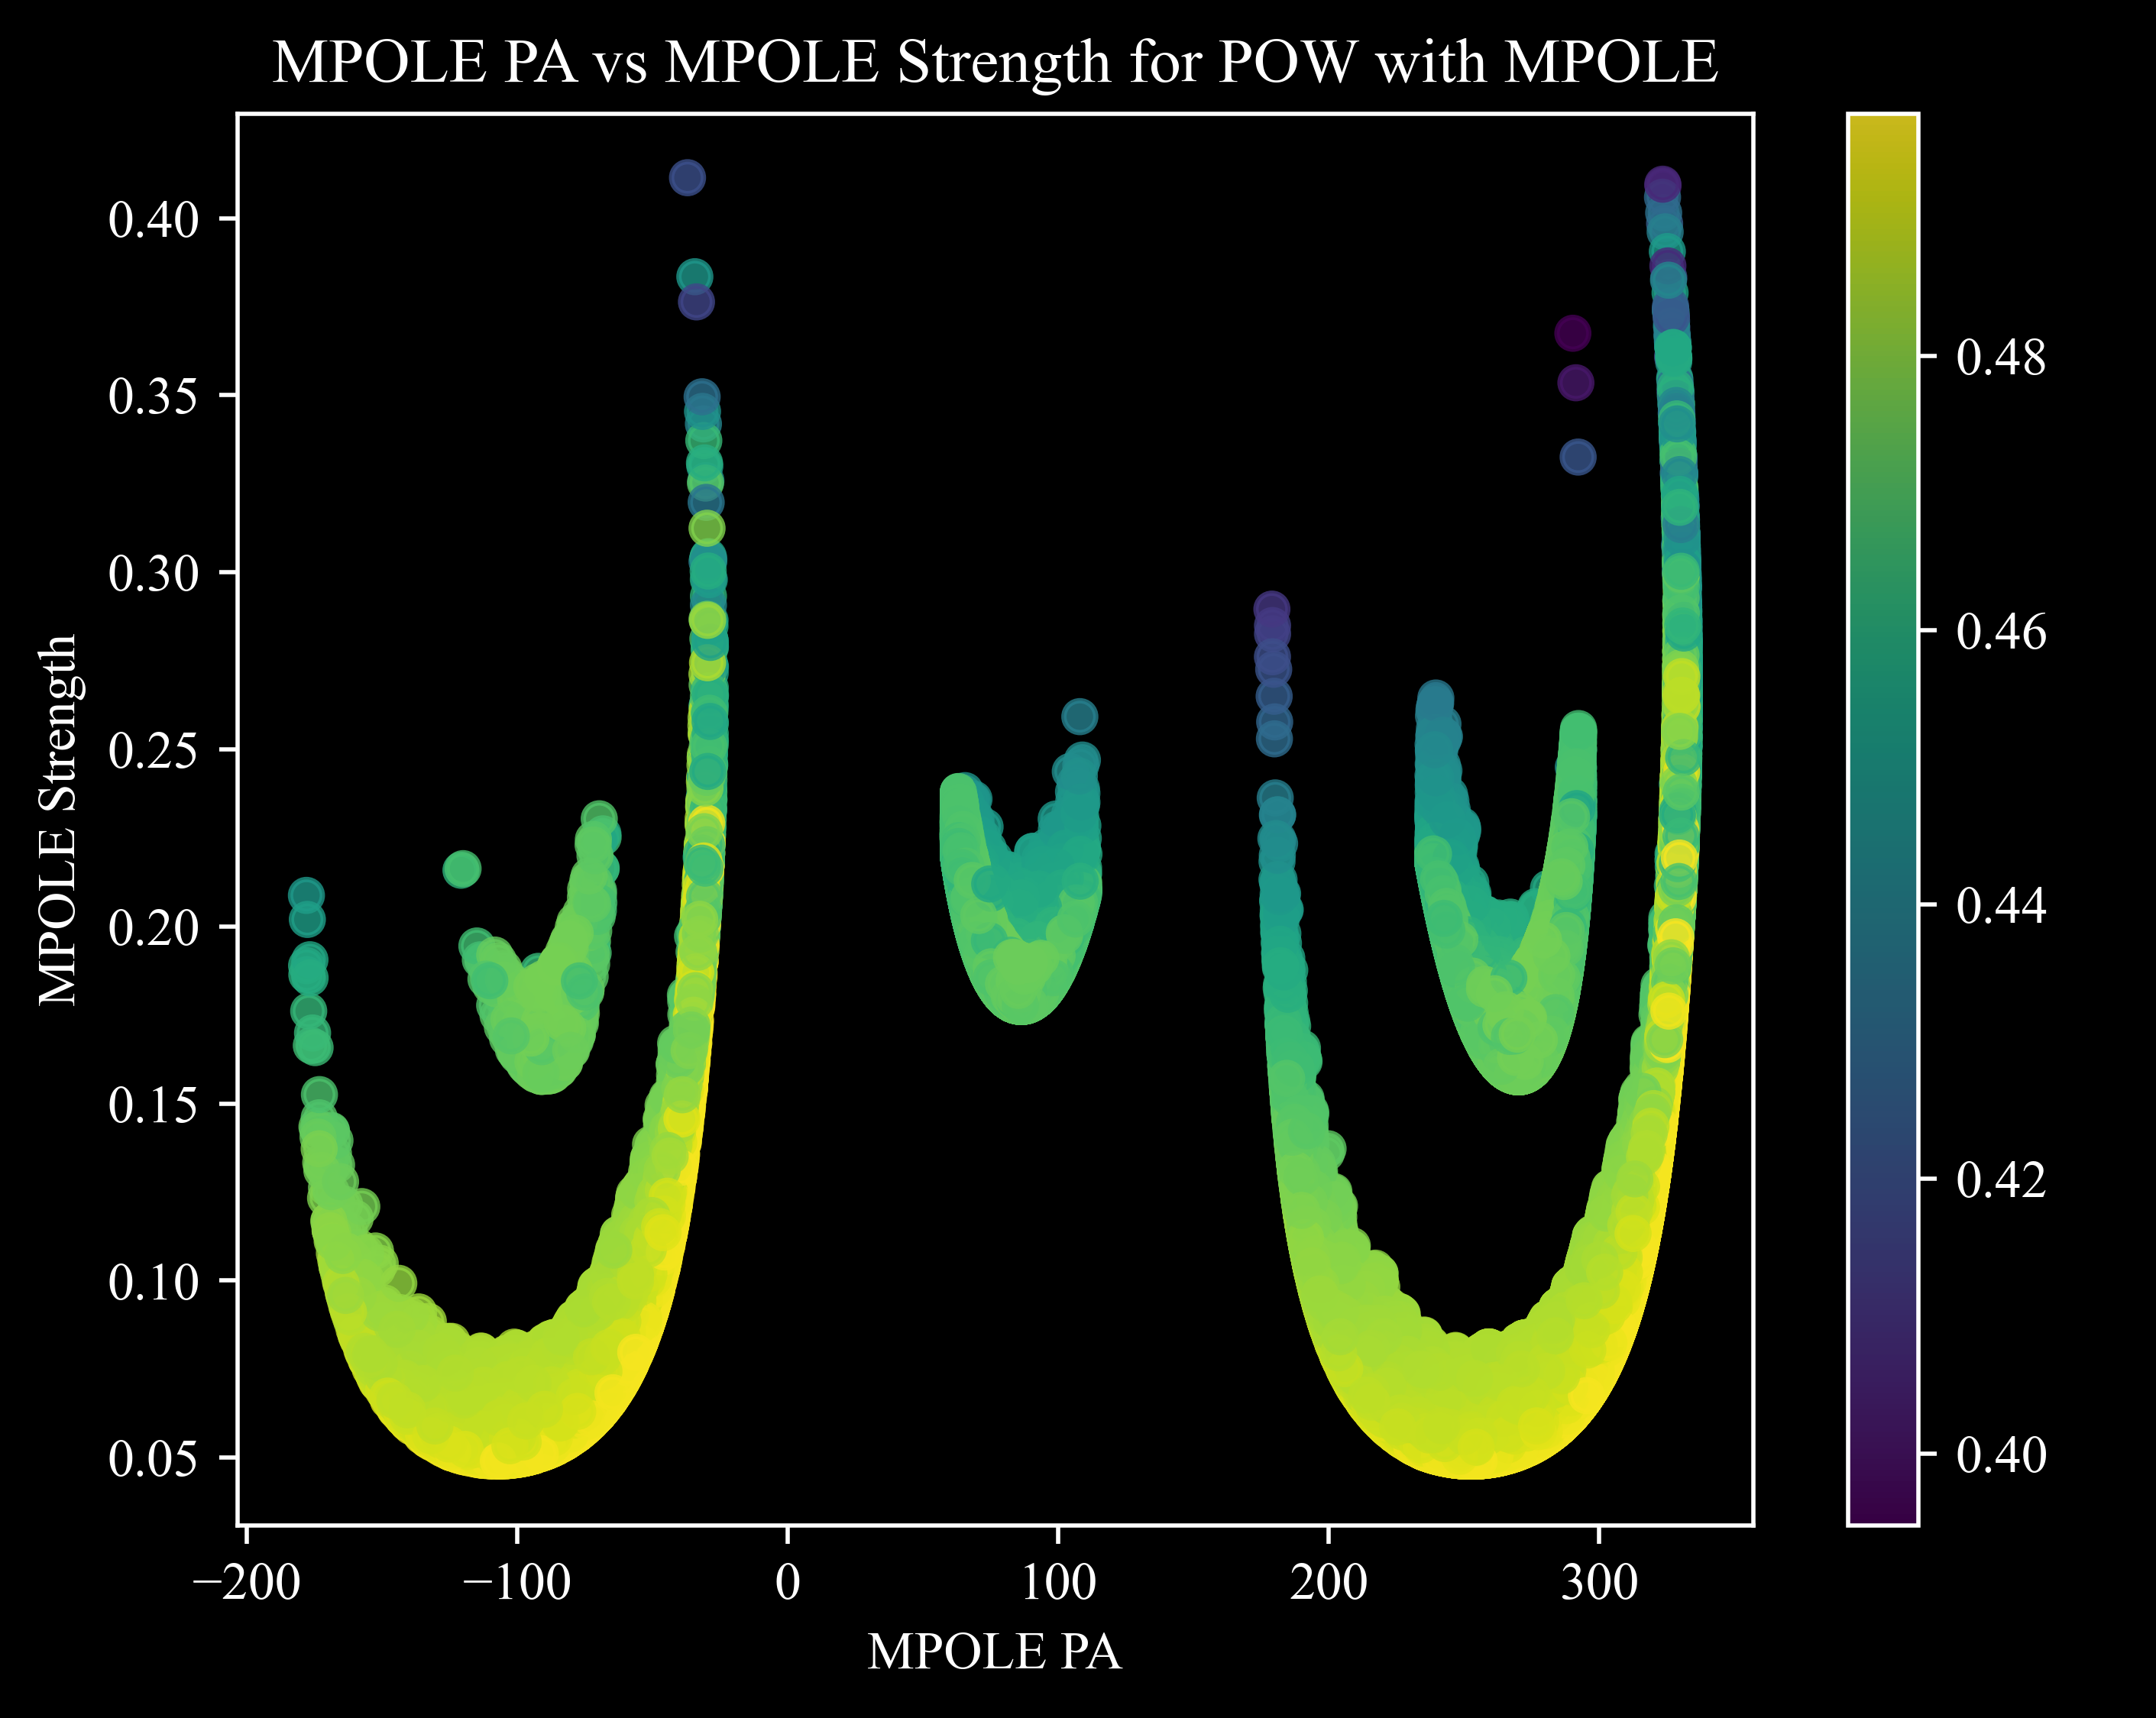

In [34]:
plt.scatter(filtered_df['t_mpole_pa'], filtered_df['t_mpole_str'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('MPOLE PA', color = 'w')
plt.ylabel('MPOLE Strength', color = 'w')
plt.title('MPOLE PA vs MPOLE Strength for POW with MPOLE')
plt.show()

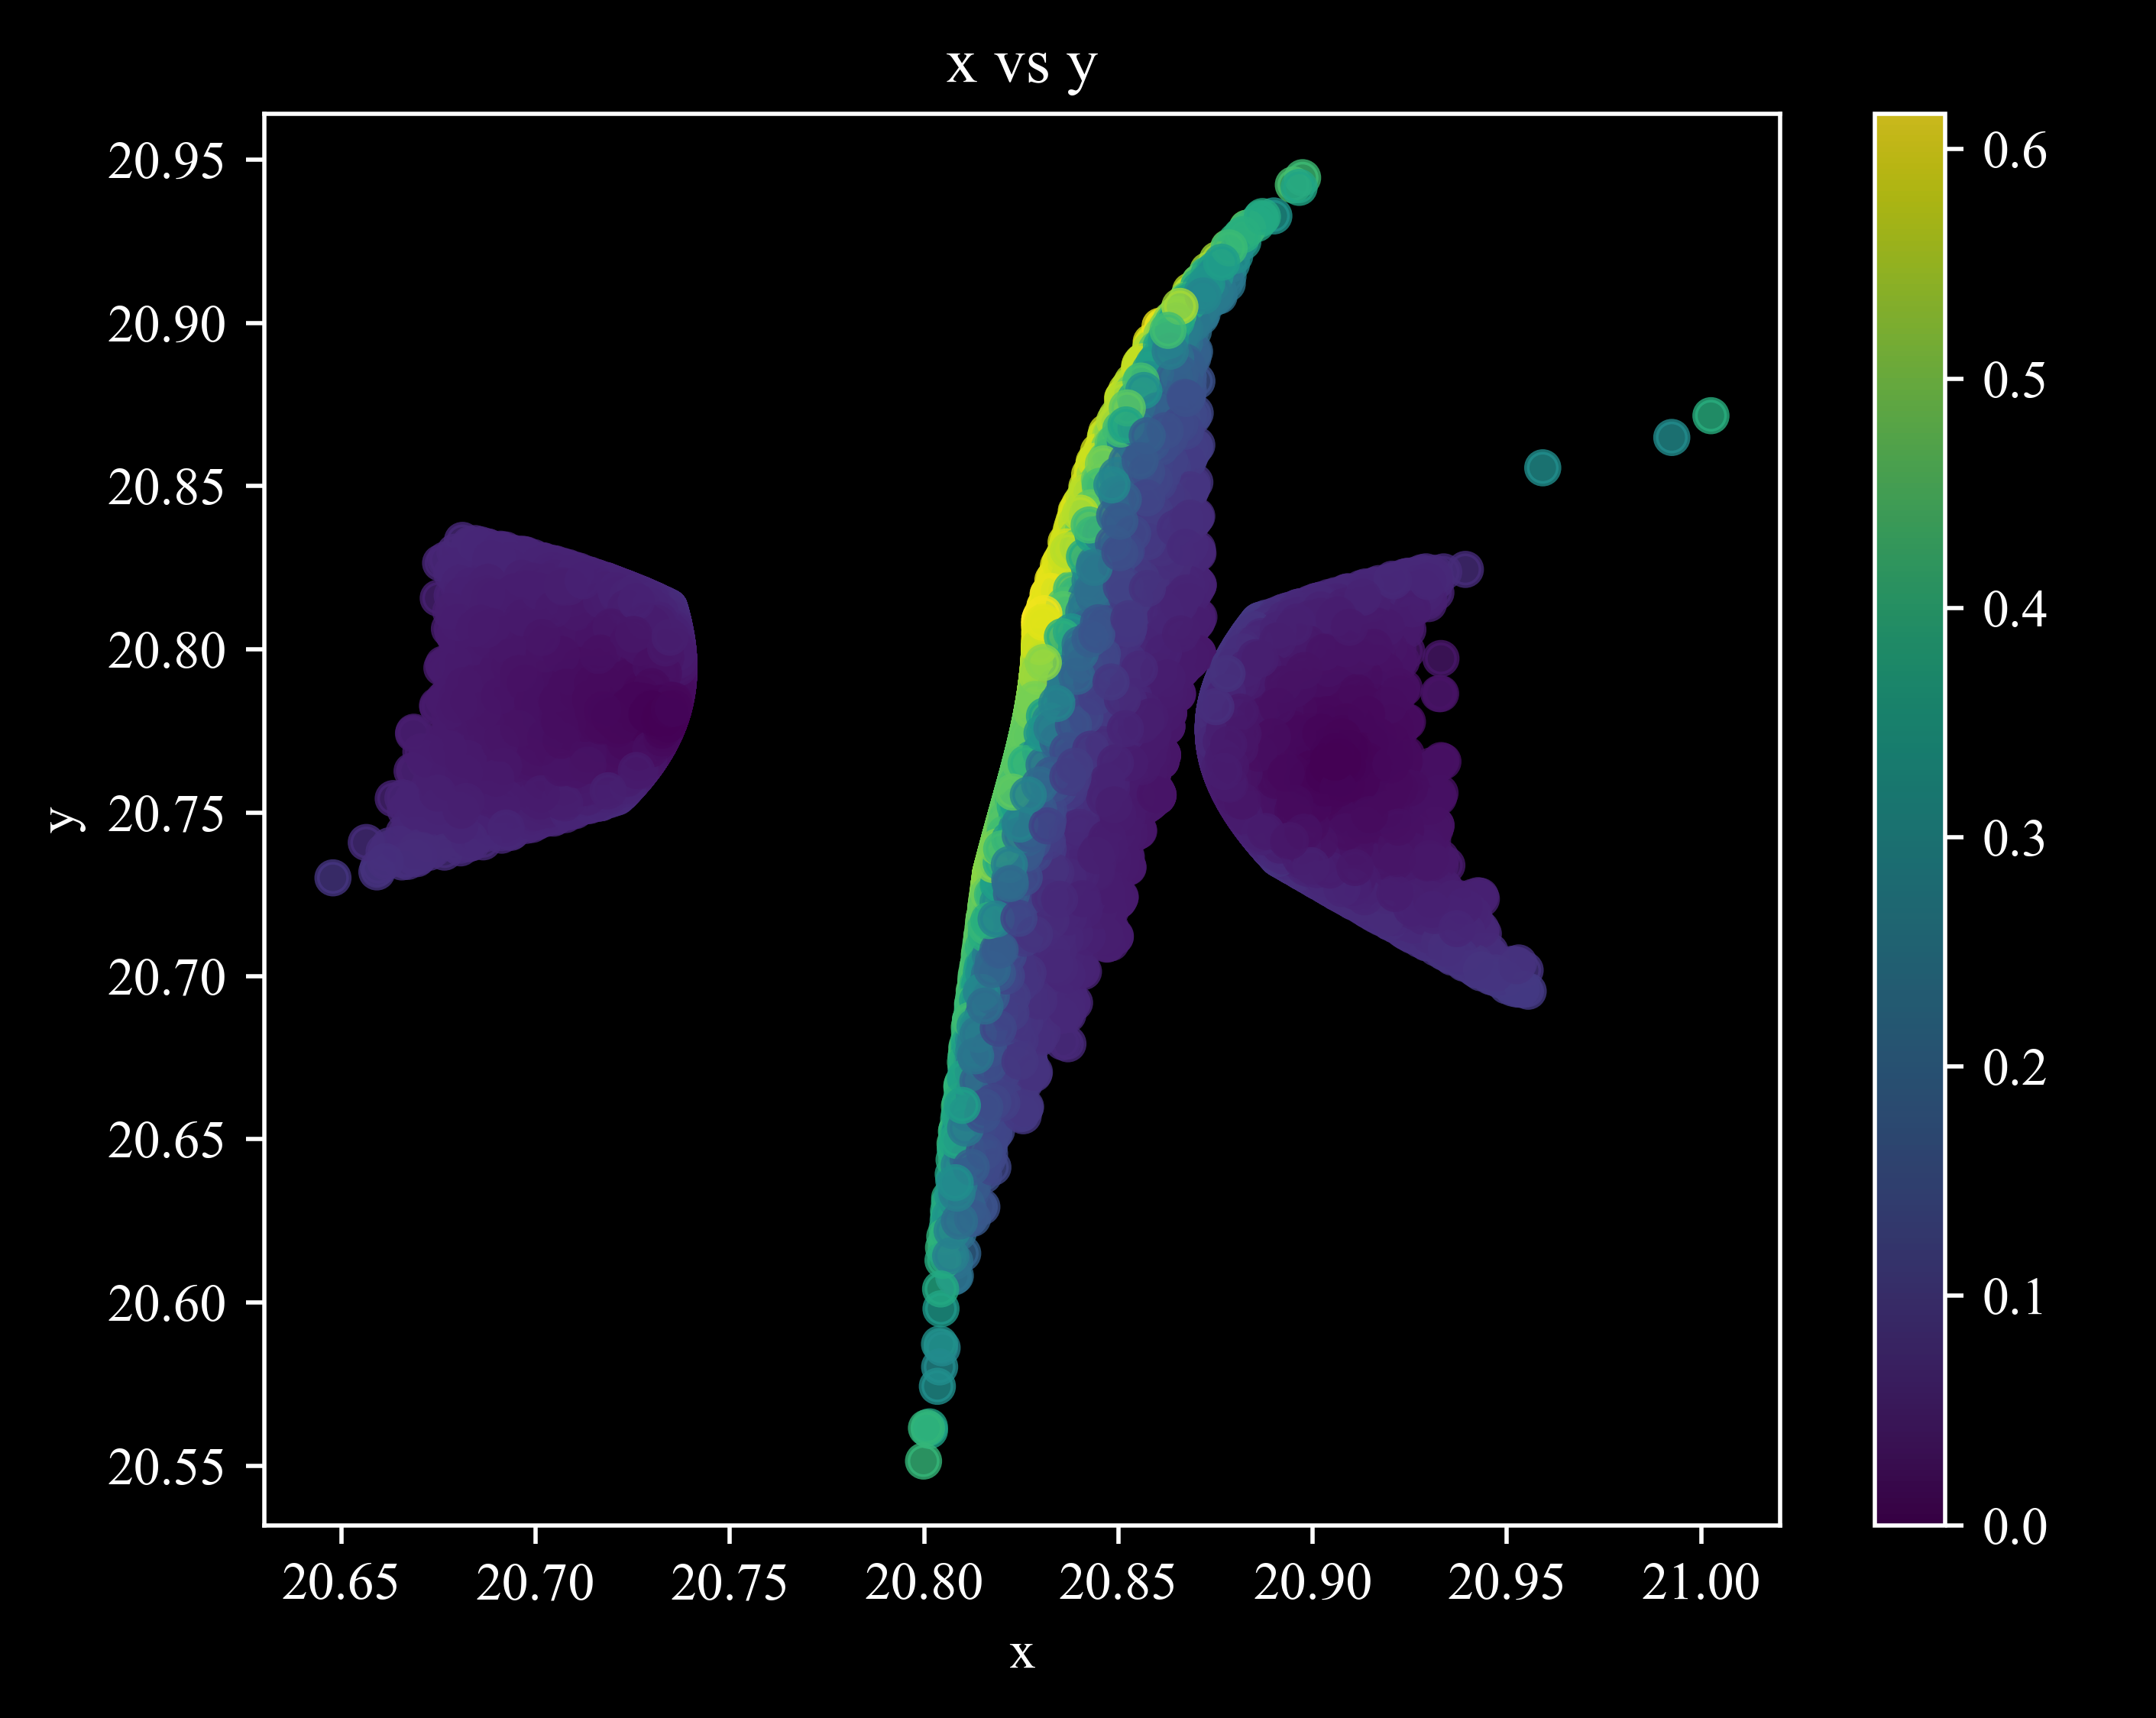

In [35]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

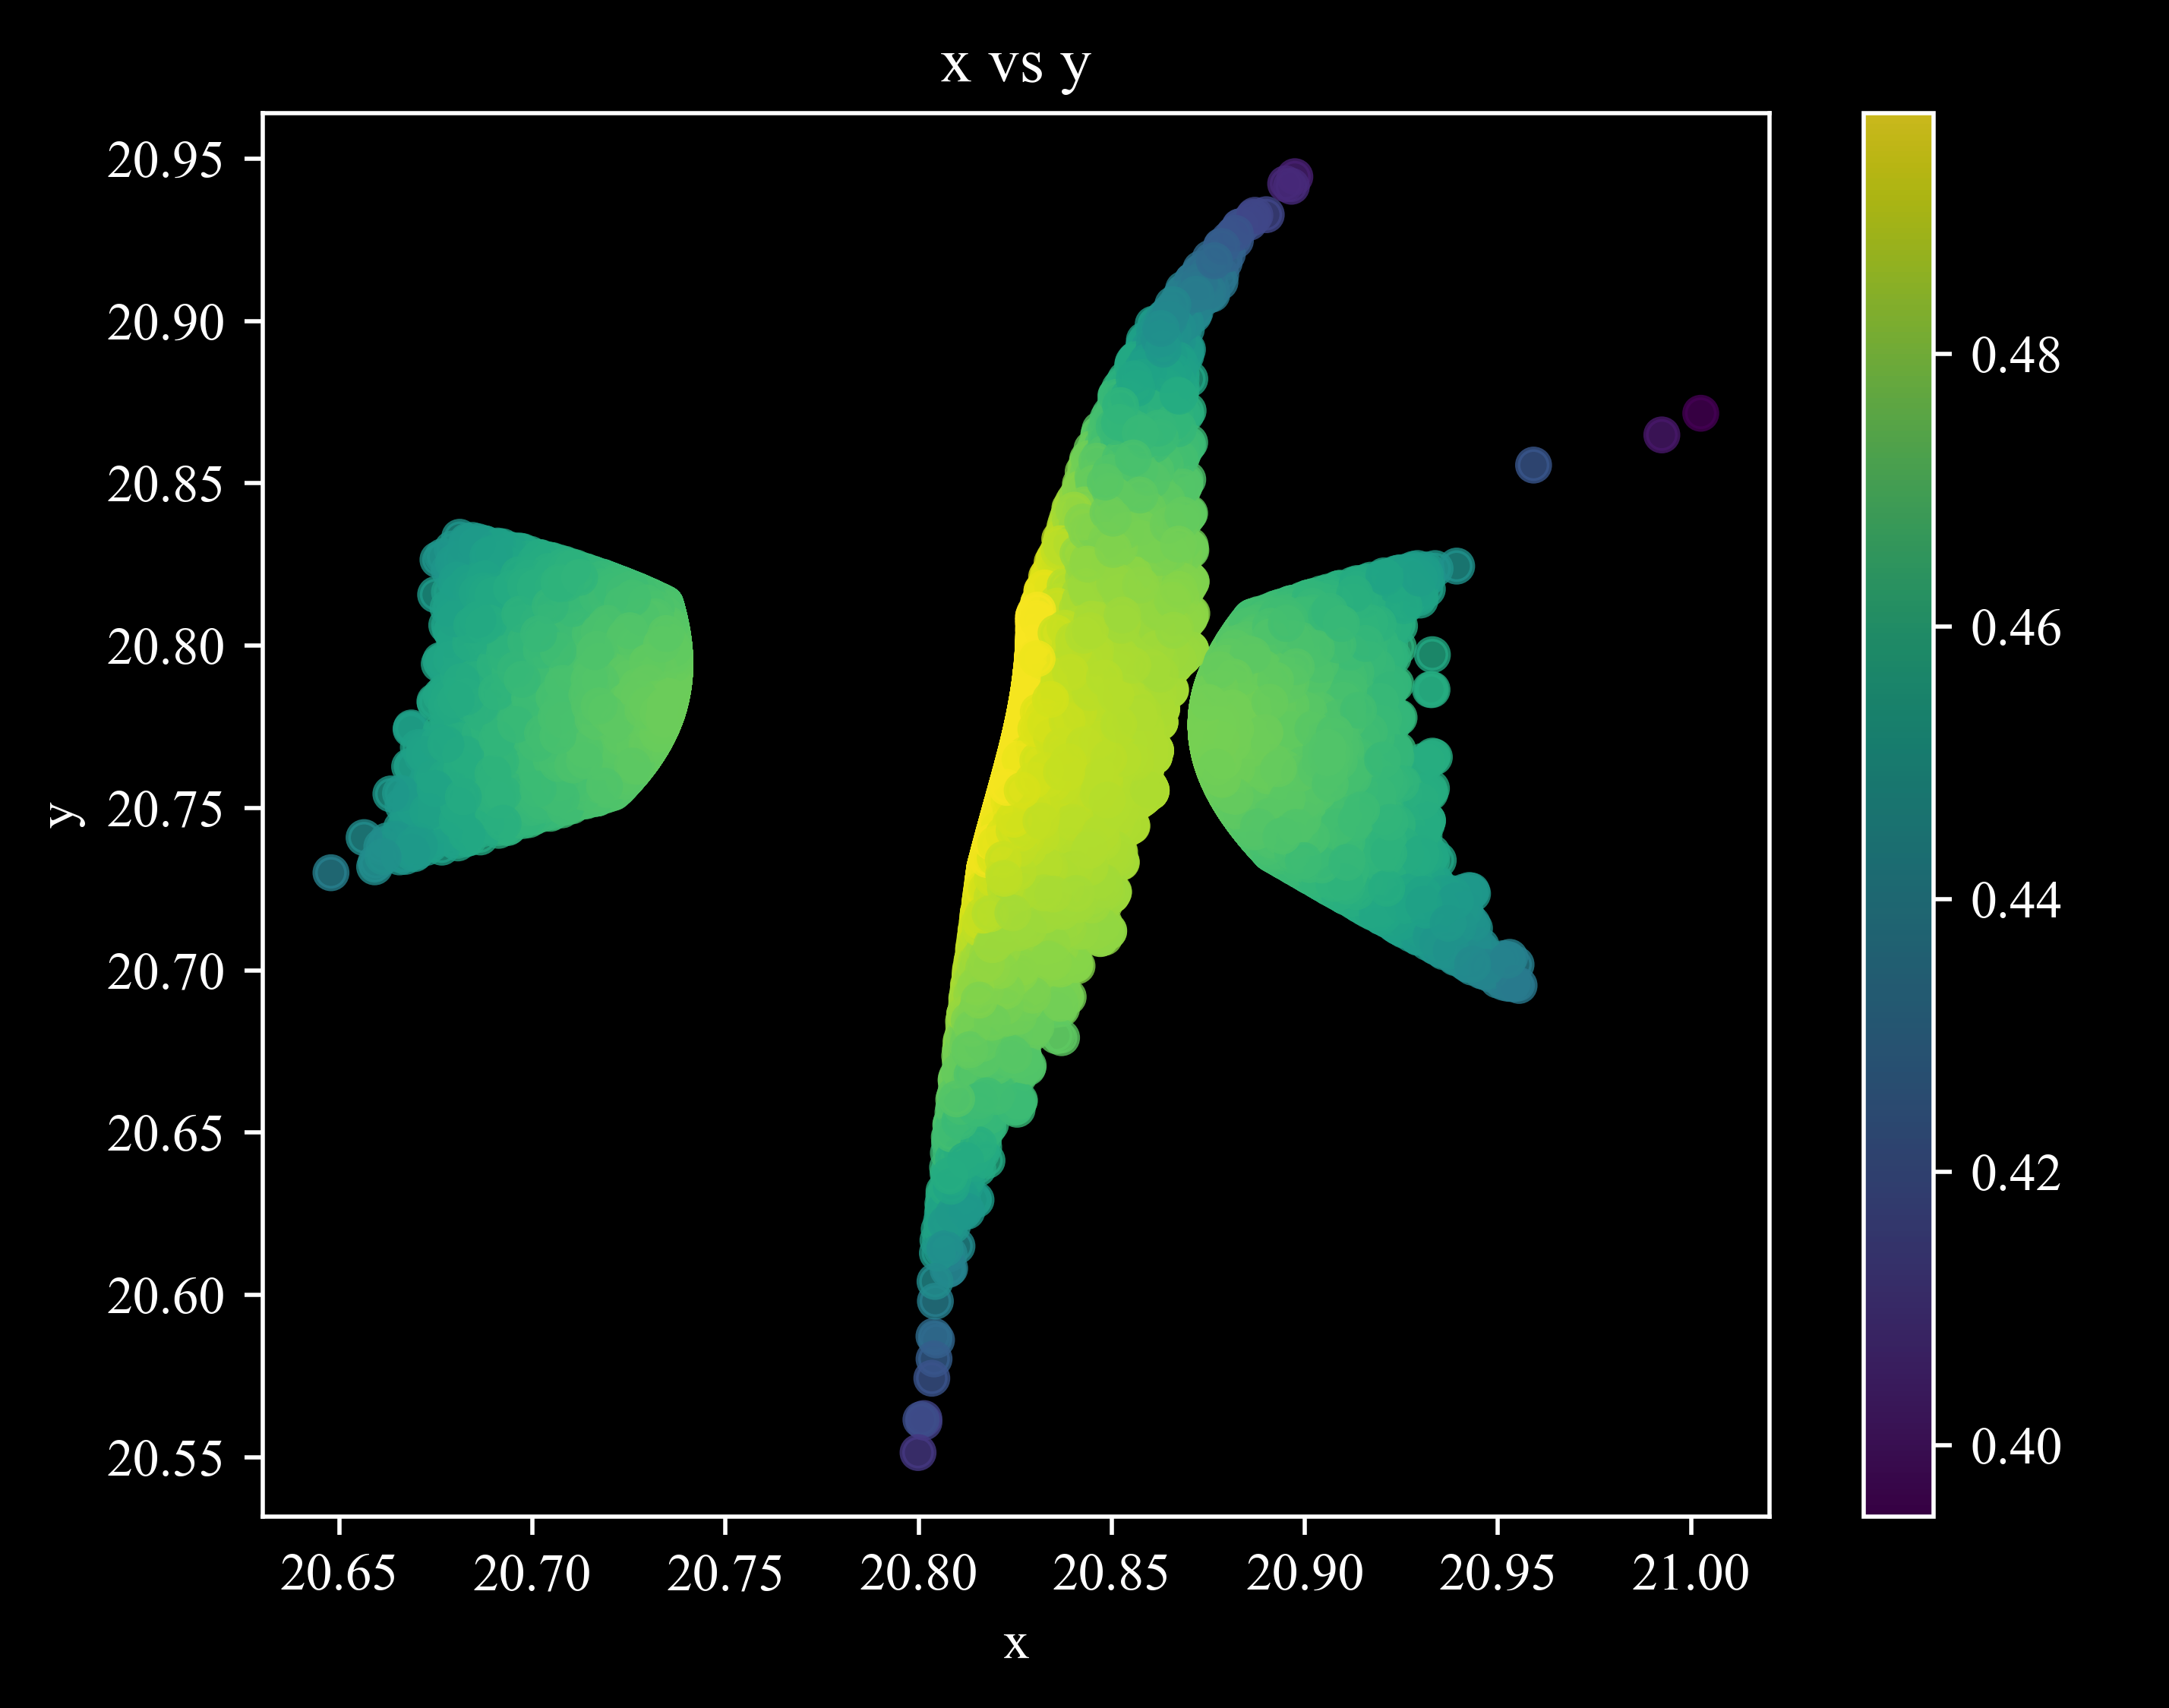

In [37]:
plt.scatter(filtered_df['x'], filtered_df['y'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('y', color = 'w')
plt.title('x vs y')
plt.show()

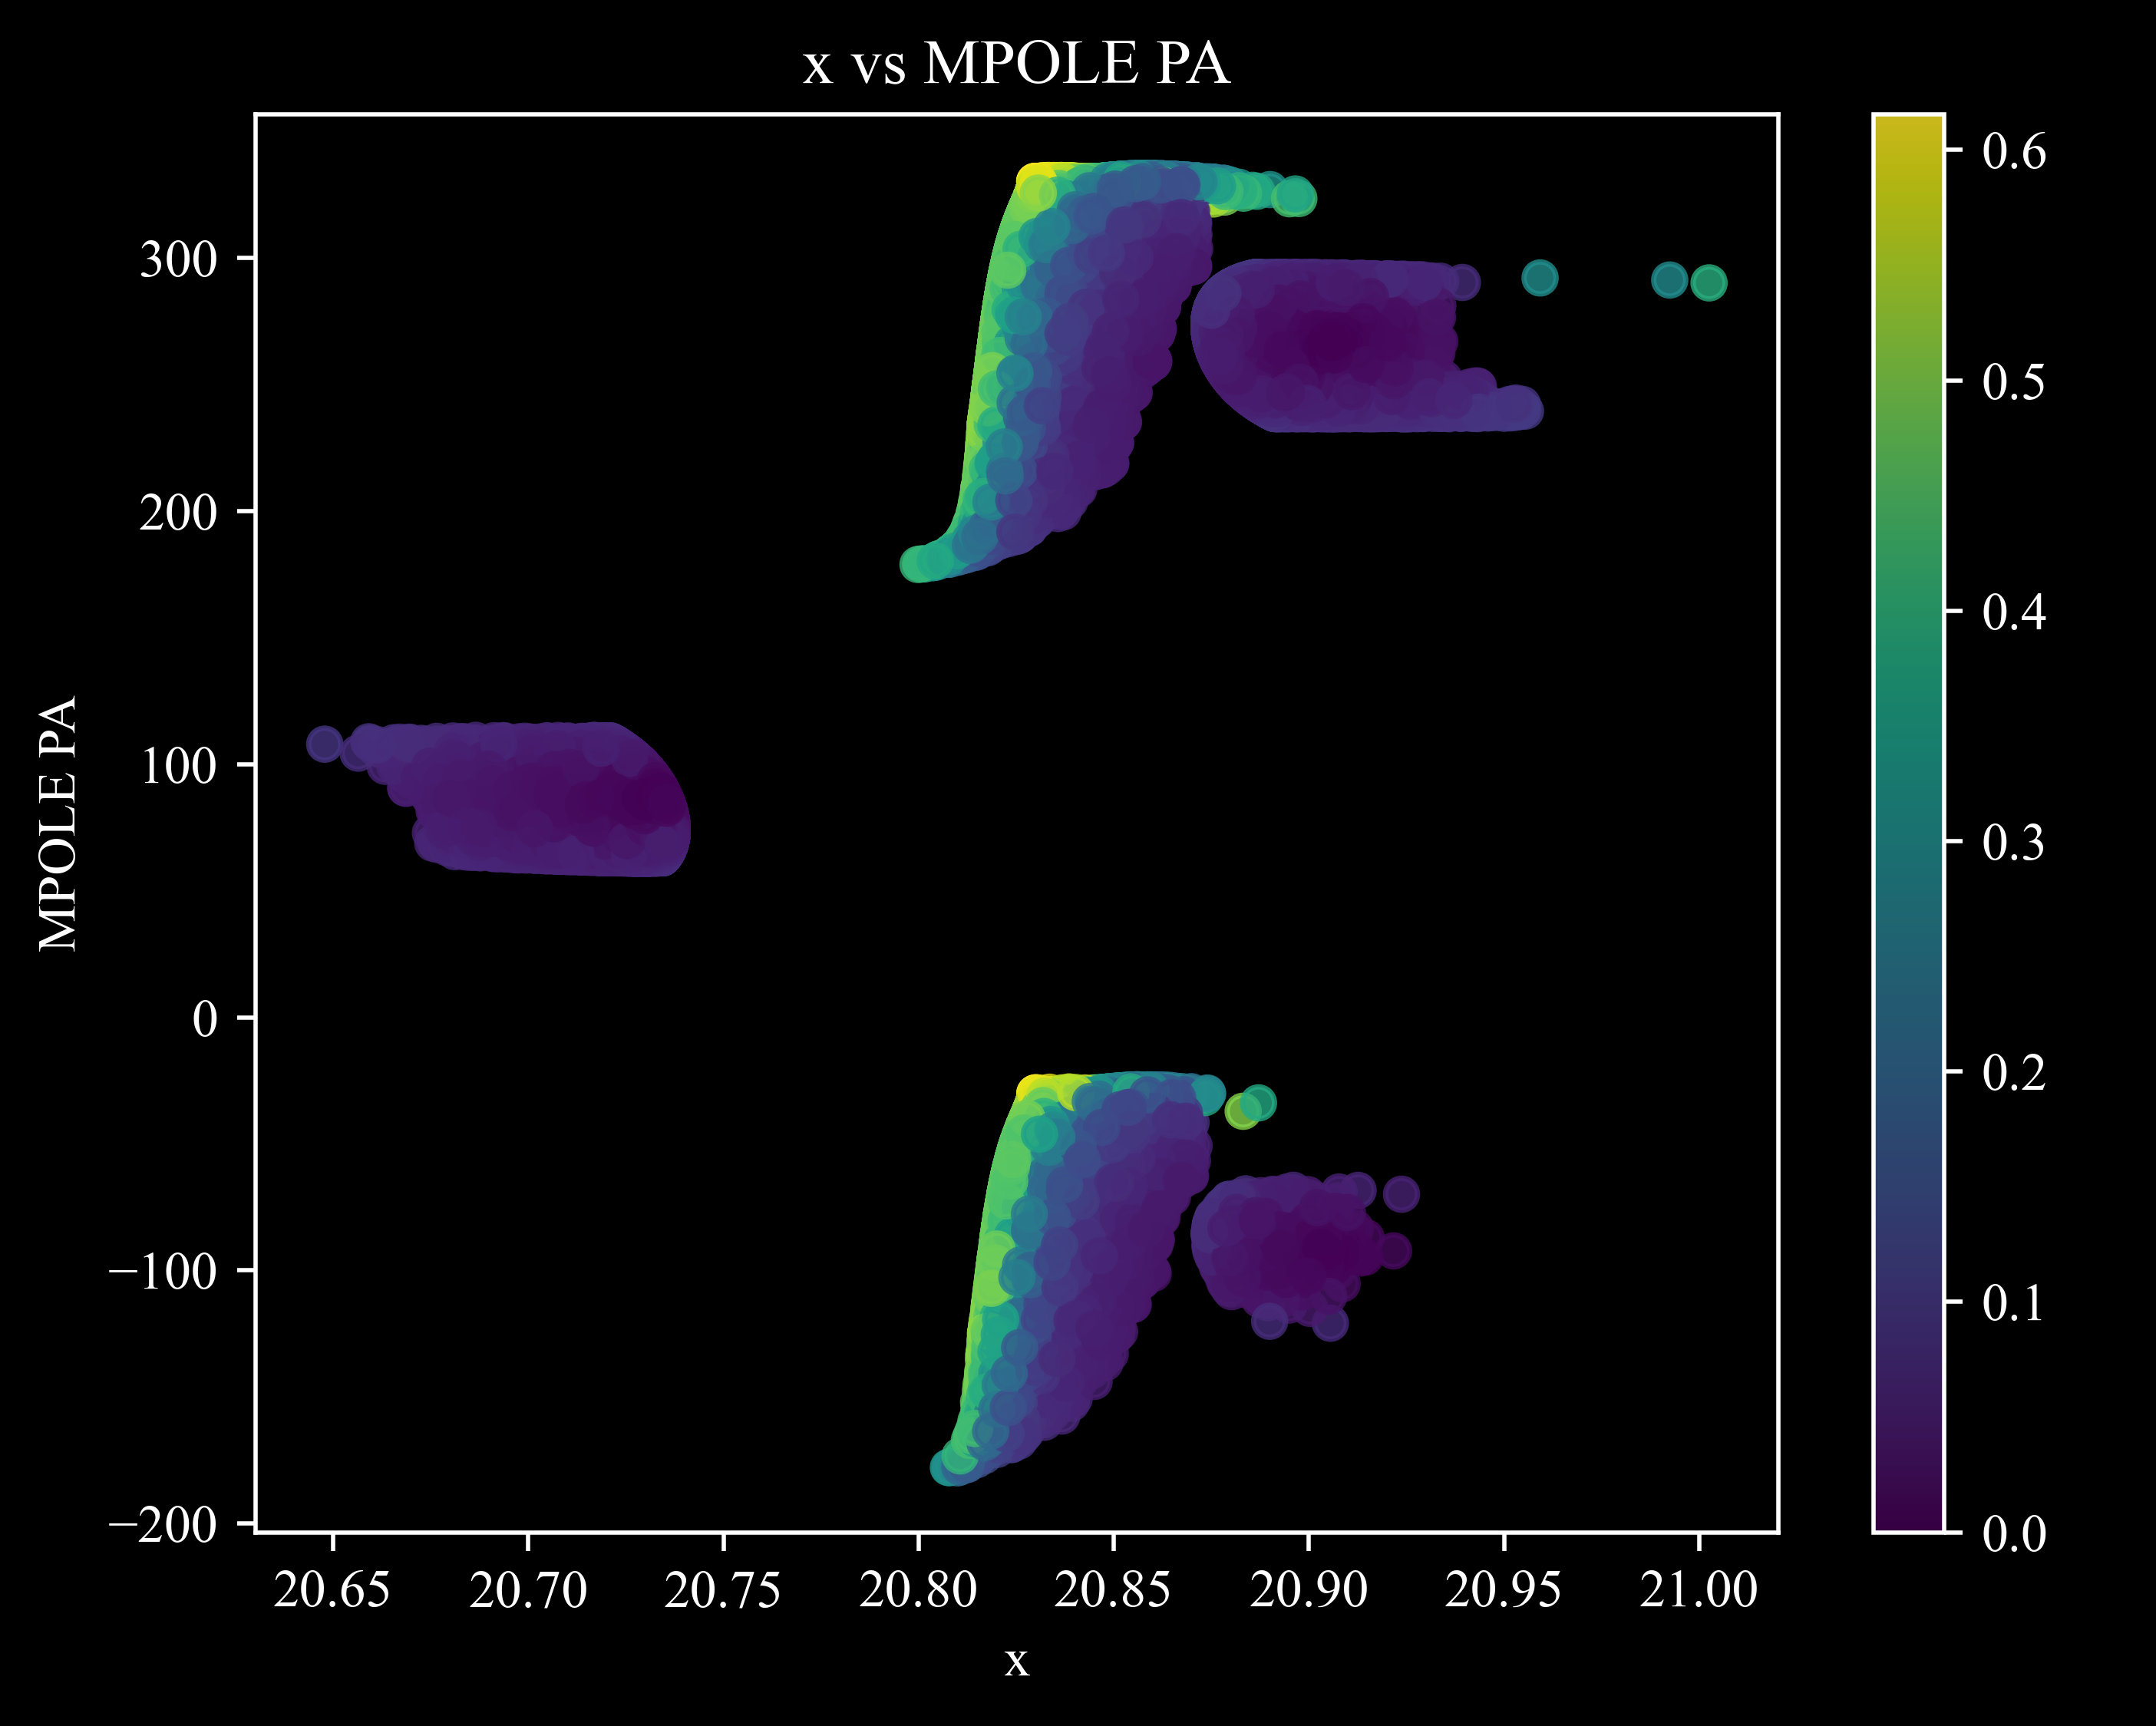

In [38]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

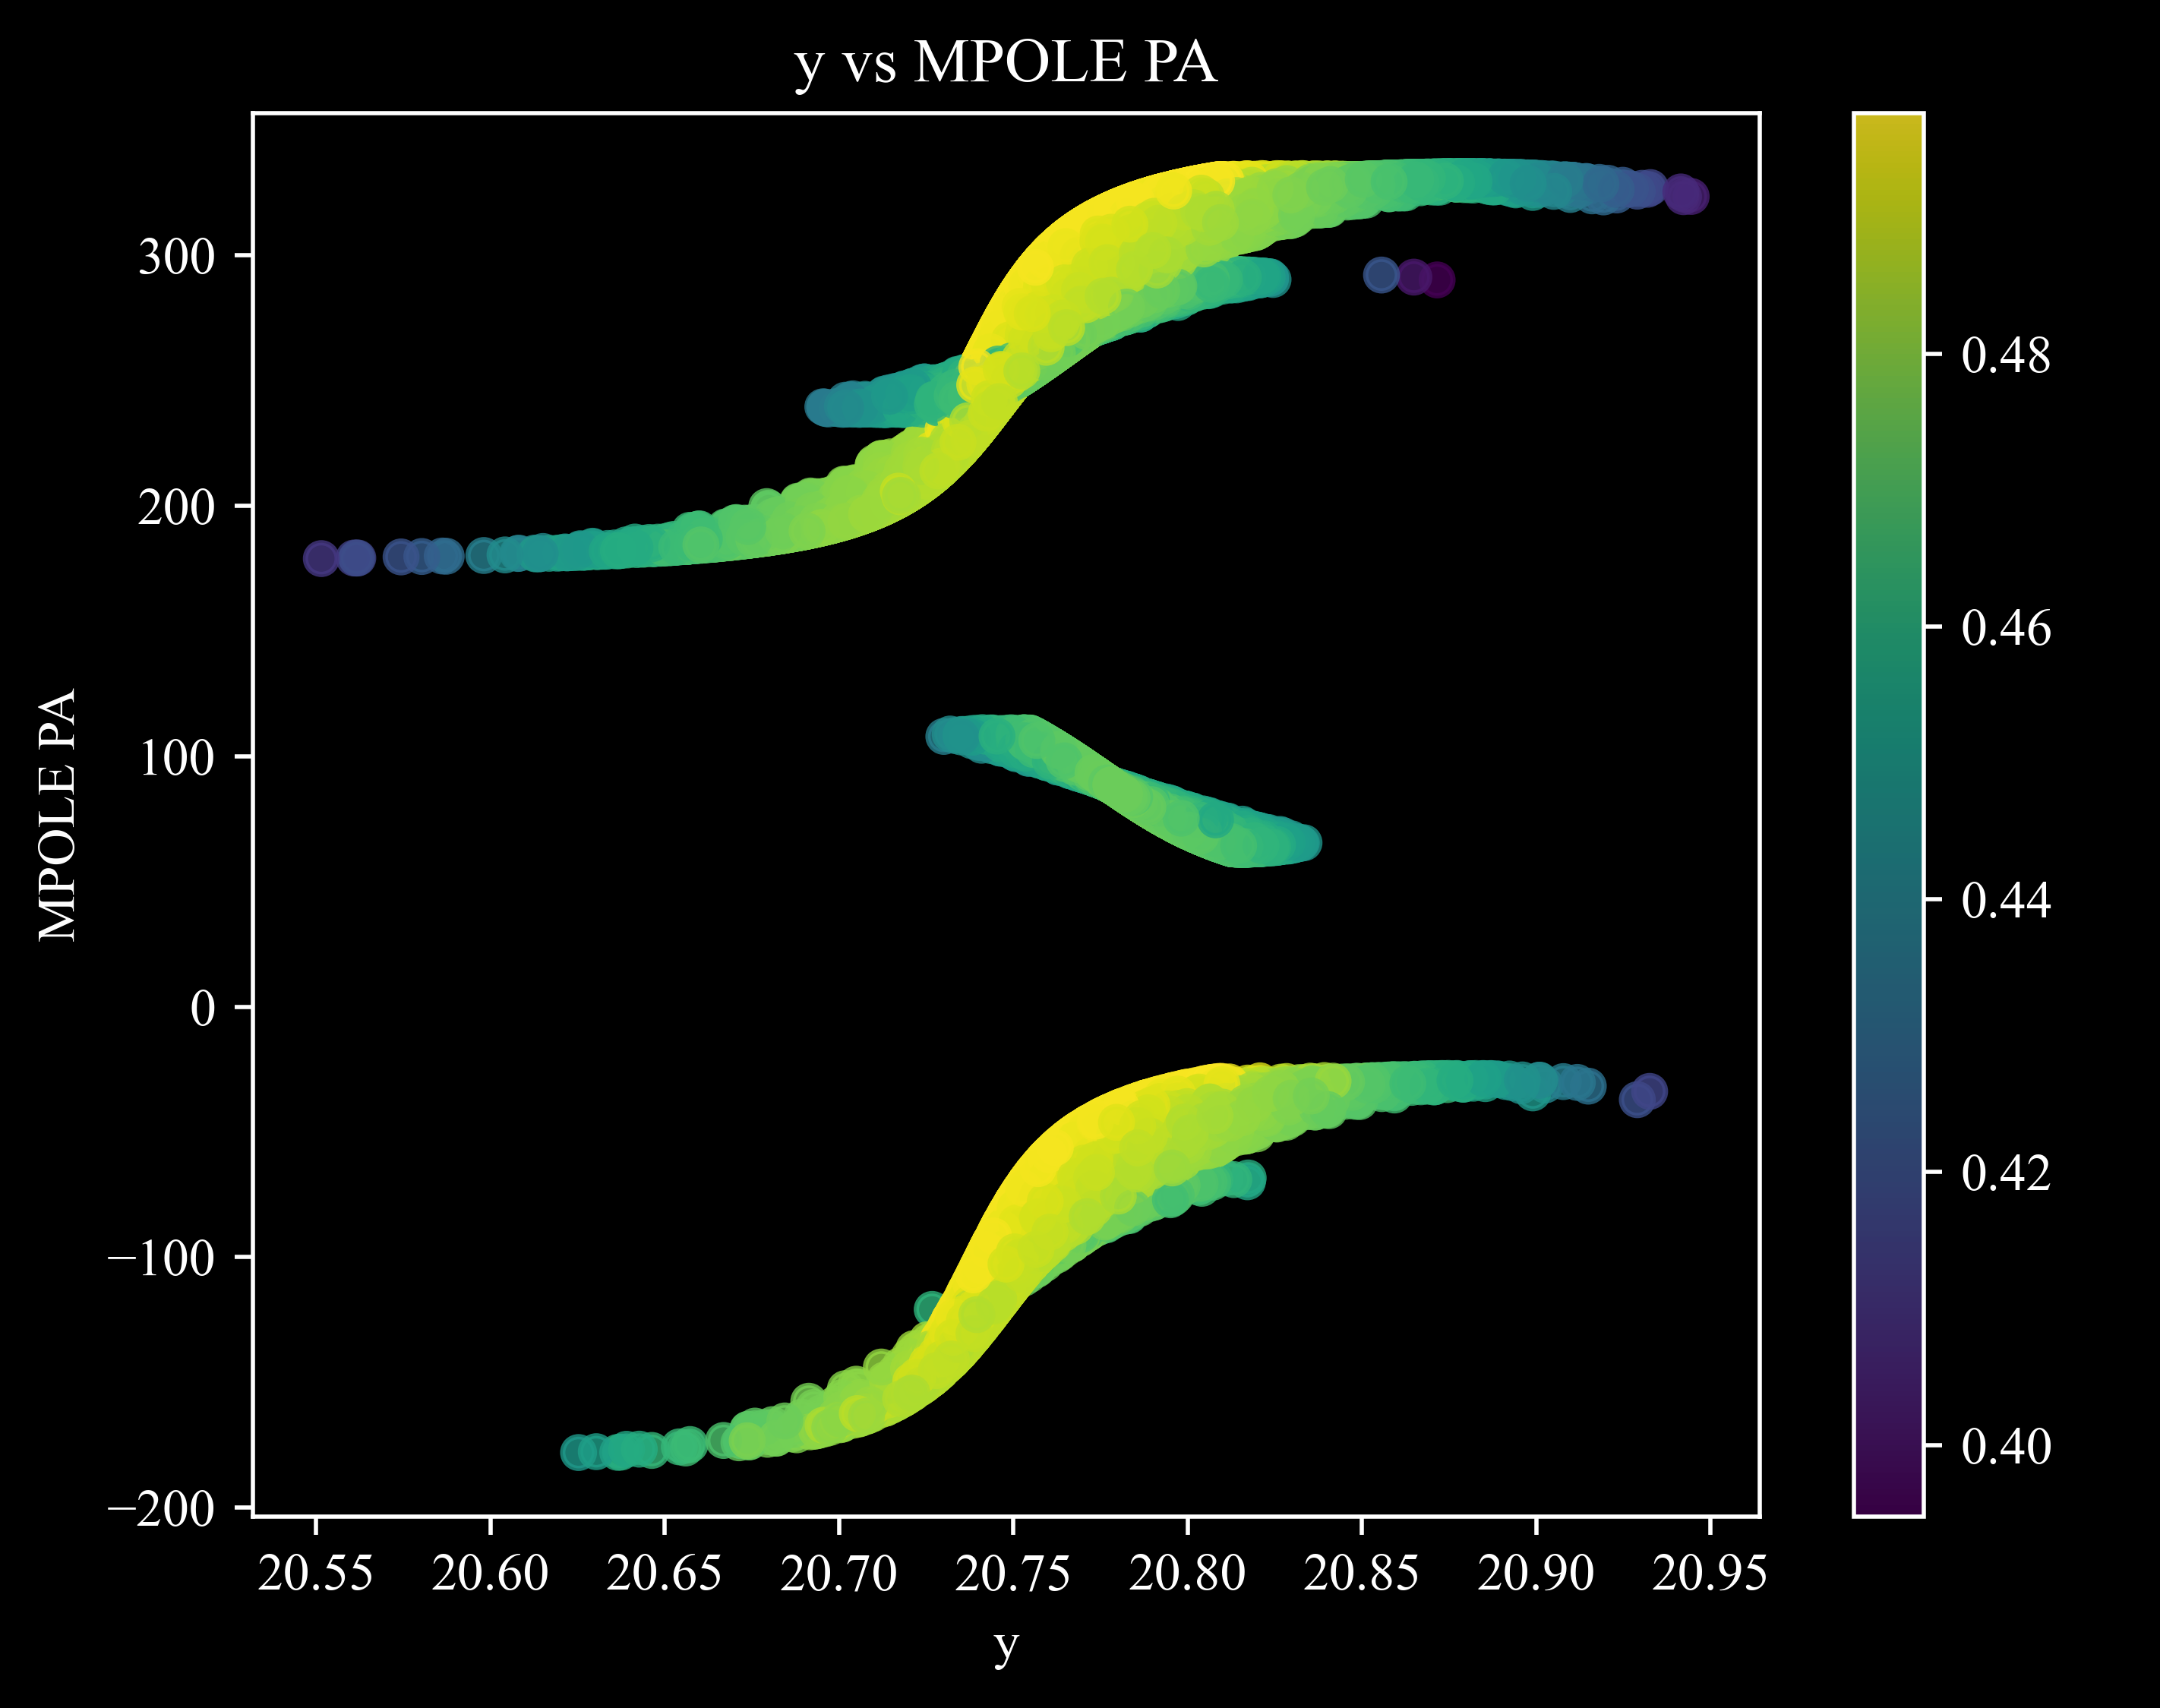

In [40]:
plt.scatter(filtered_df['y'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('y', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('y vs MPOLE PA')
plt.show()

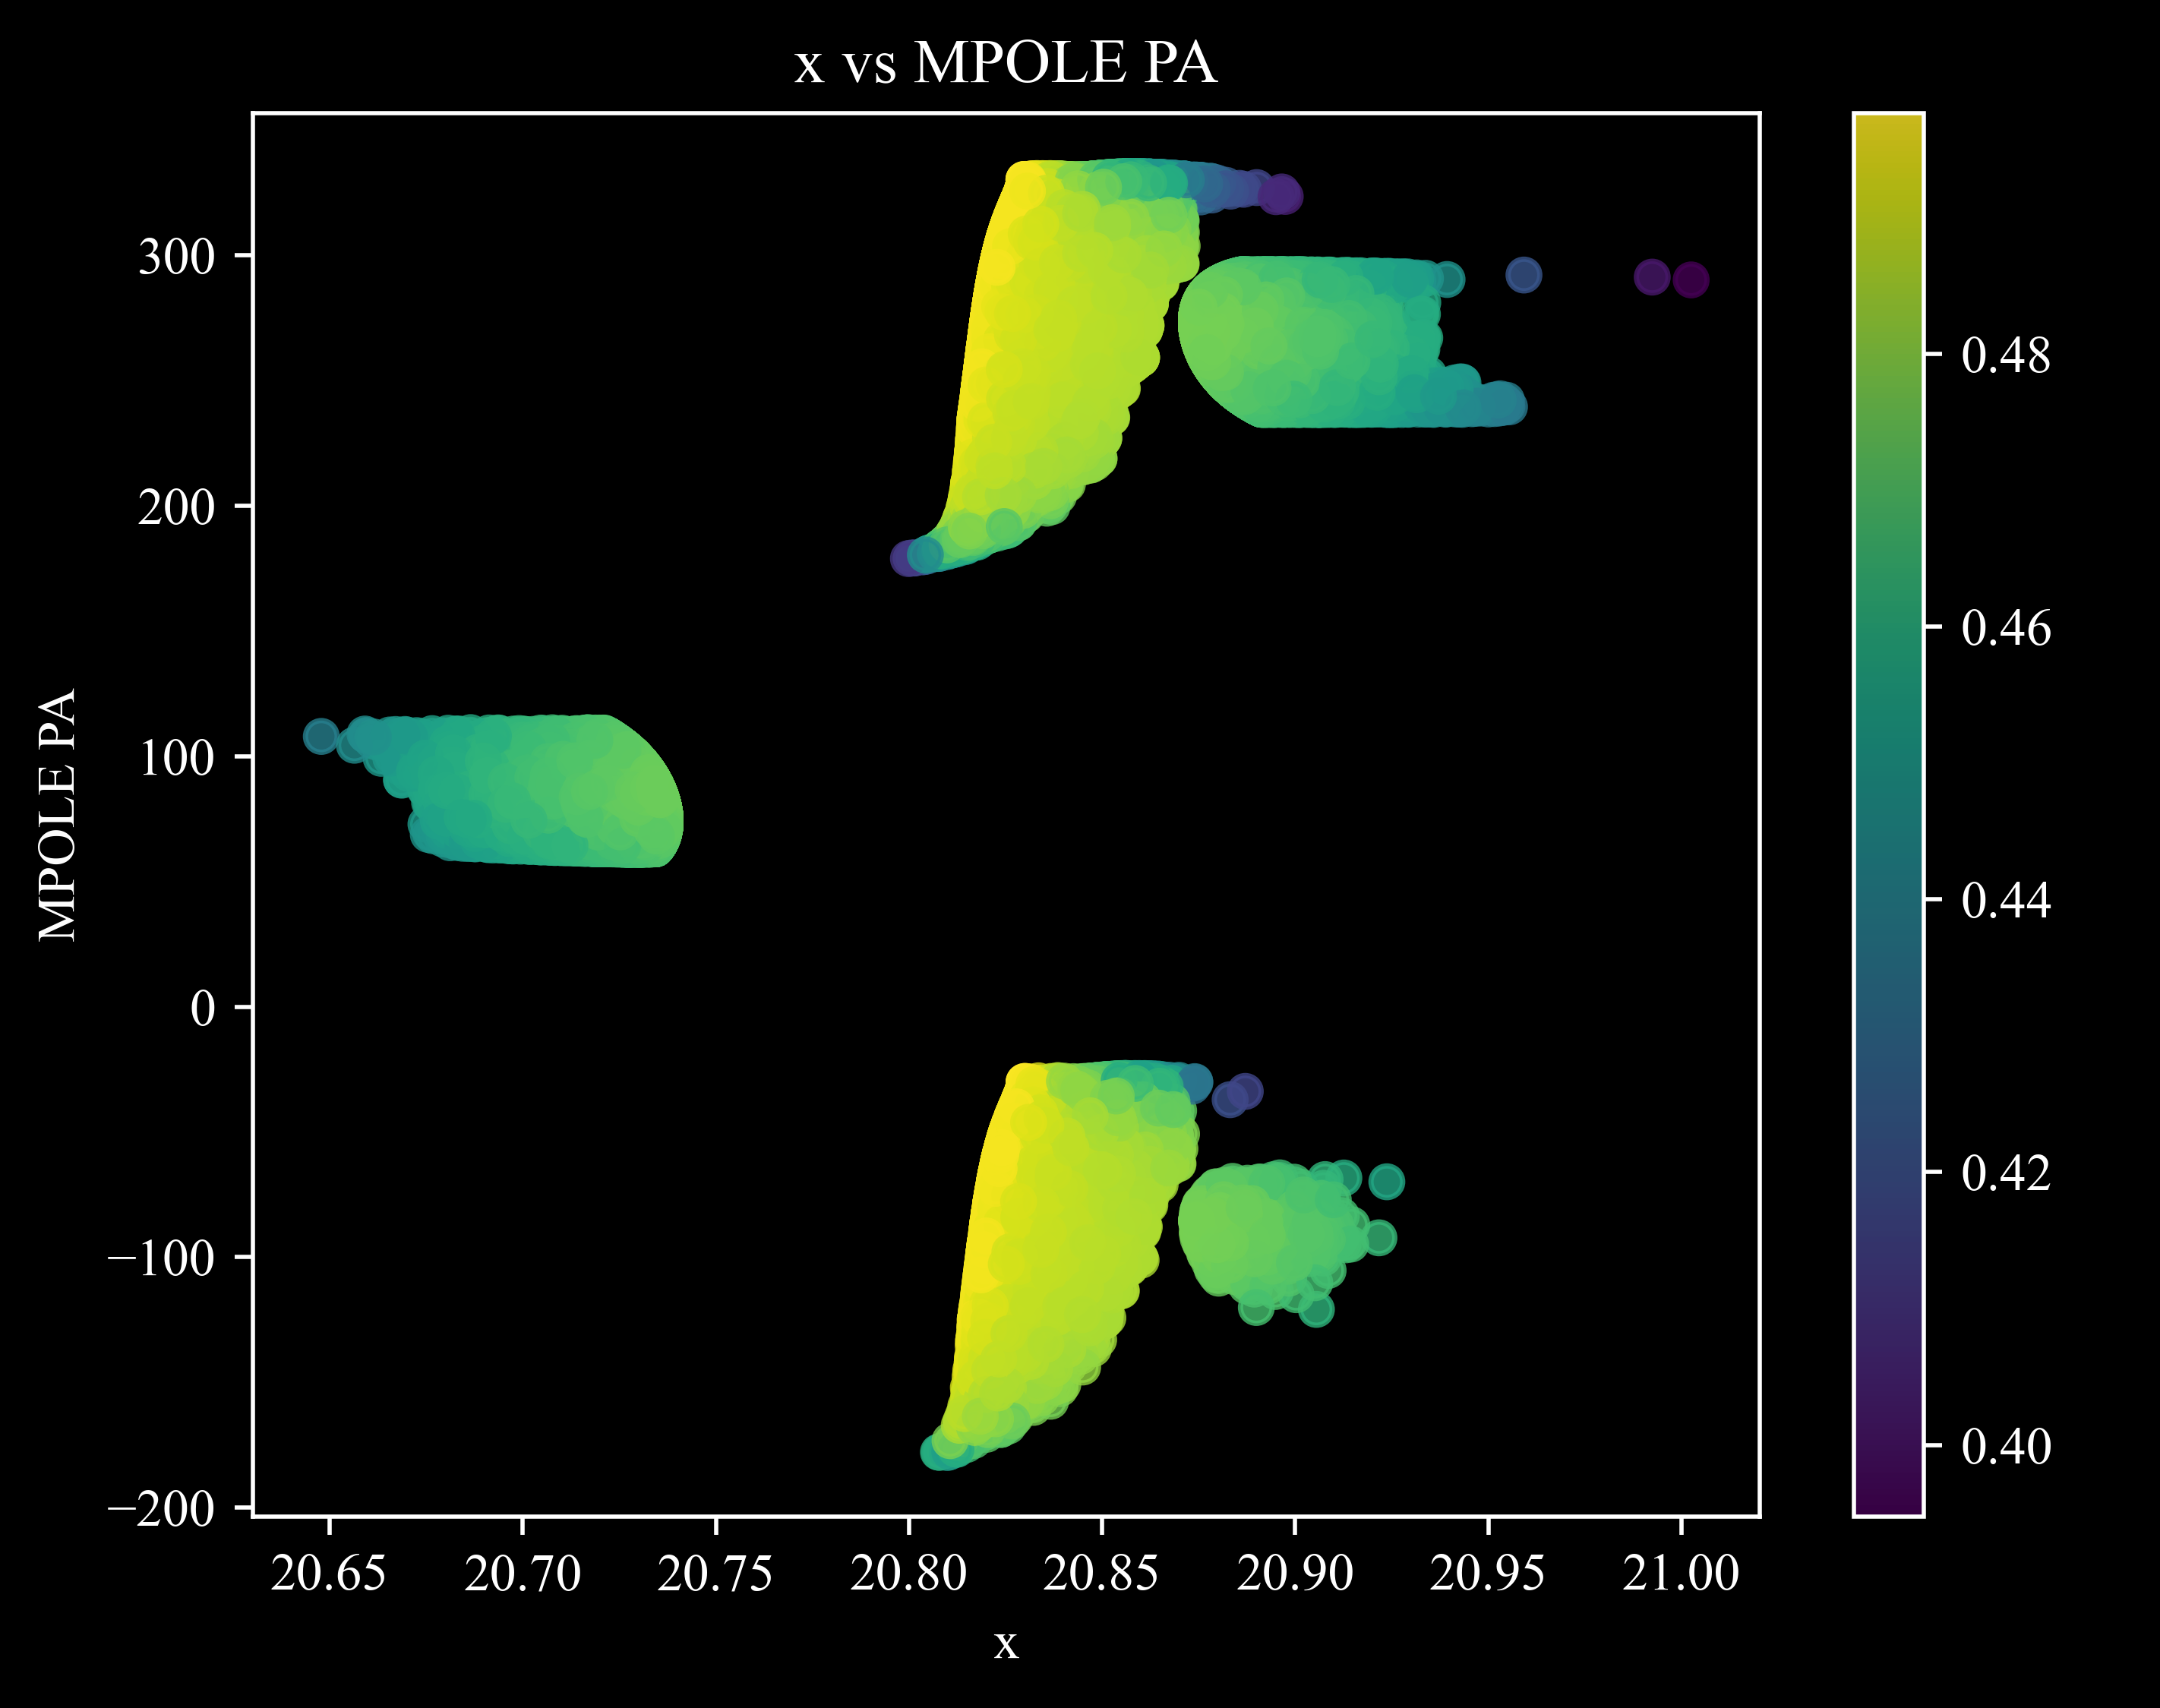

In [41]:
plt.scatter(filtered_df['x'], filtered_df['t_mpole_pa'], c=filtered_df['r_ein'], alpha=0.8)
plt.colorbar(label='Einstein Radius')
plt.xlabel('x', color = 'w')
plt.ylabel('MPOLE PA', color = 'w')
plt.title('x vs MPOLE PA')
plt.show()

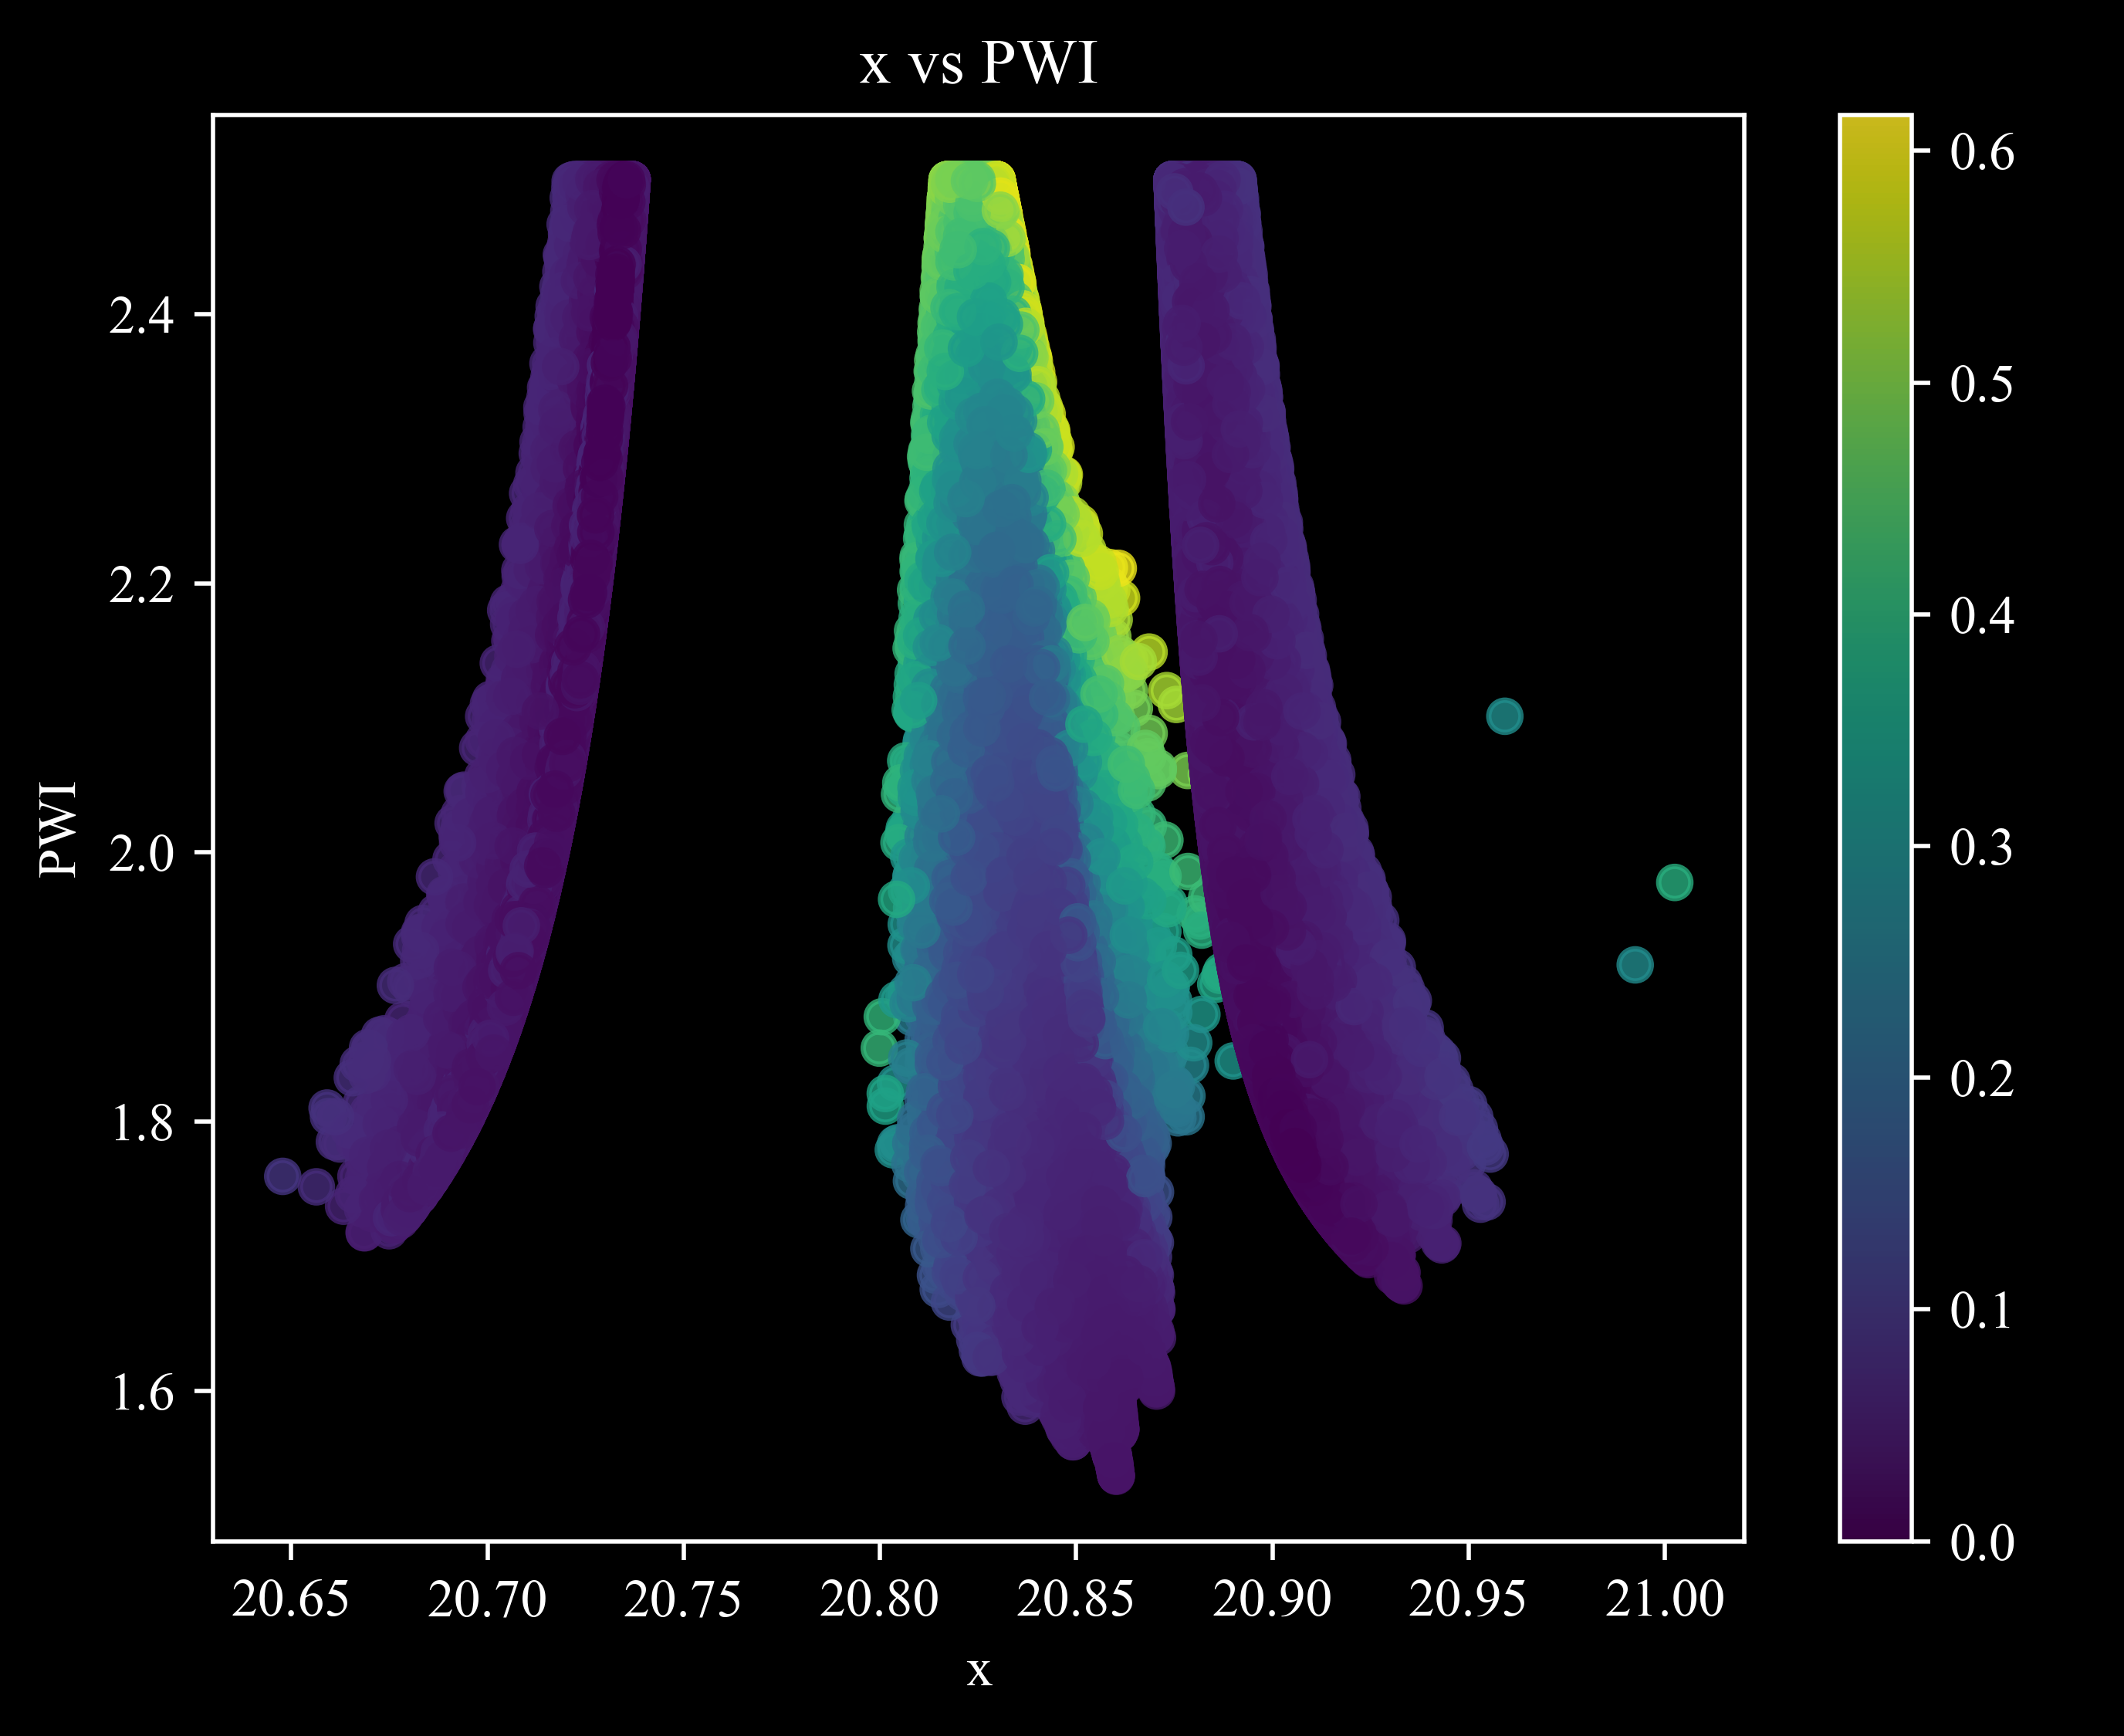

In [47]:
plt.scatter(filtered_df['x'], filtered_df['pwi'], c=filtered_df['e'], alpha=0.8)
plt.colorbar(label='Ellipticity')
plt.xlabel('x', color = 'w')
plt.ylabel('PWI', color = 'w')
plt.title('x vs PWI')
plt.show()